In [1]:

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import geopandas as gpd
import matplotlib.pyplot as plt
from imview import pltlib
import pandas as pd
from pygeotools.lib import warplib,geolib,iolib,malib,filtlib,timelib
import os,sys,glob,shutil
from debris_cover_smb import glac_dyn, constants, geospatial
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

## Ngozumpa

In [39]:
%cd /nobackup/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/Ngozumpa/SMB_data/

/nobackupp11/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/Ngozumpa/SMB_data


In [40]:
constants.rgi_dicts['ngozumpa']

'RGI60-15.03473'

In [41]:
model1_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_{constants.rgi_dicts['ngozumpa']}.tif"
model2_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_{constants.rgi_dicts['ngozumpa']}.tif"
model3_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_{constants.rgi_dicts['ngozumpa']}.tif"
model4_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_4/RGI60-15/thickness_{constants.rgi_dicts['ngozumpa']}.tif"

In [42]:
ls $model1_H_fn

/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_RGI60-15.03473.tif


In [43]:


vx_fn = '20121223_combined_hs__20150115_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip.tif'
vy_fn = '20121223_combined_hs__20150115_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip.tif'
vx_millan_fn,vy_millan_fn,vm_millan_fn = constants.fetch_millan_velocity('ngozumpa')
divq2_concensus_fn = 'ngozumpa_farinotti_2012-12-23_to_2015-01-15_divQ2.tif'
glac_shp = gpd.read_file(constants.fetch_glac_shp(constants.rgi_dicts['ngozumpa'])).to_crs("EPSG:32645")
H_fn = constants.fetch_farinotti_thickness('ngozumpa')
millan_H_fn = constants.fetch_millan_thickness('ngozumpa')
ds_list = warplib.memwarp_multi_fn([H_fn,model1_H_fn,model2_H_fn,model3_H_fn,model4_H_fn,millan_H_fn,vx_fn,vy_fn,vx_millan_fn,vy_millan_fn,vm_millan_fn,divq2_concensus_fn],extent='last')
H,model1,model2,model3,model4,millan_H,vx,vy,vx_millan,vy_millan,vm_millan,divq2_consensus = [iolib.ds_getma(ds) for ds in ds_list]


Warping all inputs to the following:
Resolution: 50.0
Extent: [466125.0, 3089921.0, 476775.0, 3104071.0]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 12: /nobackupp11/sbhusha1/reference_data/farinotti_2019_ice_thickness/RGI60-15/RGI60-15.03473_thickness.tif
nl: 283 ns: 213 res: 50.000
100 - done.
0...10...20...30...40...50...60...70...80...90...2 of 12: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_RGI60-15.03473.tif
nl: 283 ns: 213 res: 50.000
100 - done.
0...10...20...30...40...50...60...70...80...90...3 of 12: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_RGI60-15.03473.tif
nl: 283 ns: 213 res: 50.000
100 - done.
0...10...20...30...40...50...60...70...80...90...4 of 12: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_RGI60-15.03473.tif
nl: 283 ns: 213 res: 50.000
100 - done.
0..

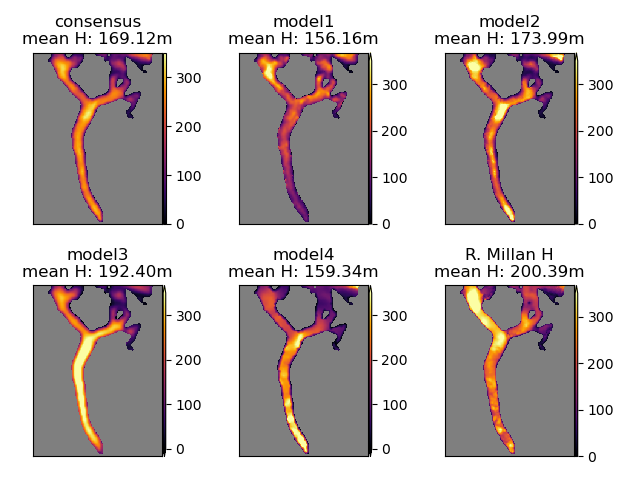

In [44]:
f,ax = plt.subplots(2,3)
models_title = ['consensus','model1','model2','model3','model4','R. Millan H']


h_models = [H,model1,model2,model3,model4,millan_H]
common_mask = malib.common_mask(h_models)
for idx,axa in enumerate(ax.ravel()):
    h = np.ma.array(h_models[idx],mask=common_mask)
    mean = np.ma.mean(h)
    plt_title = f"{models_title[idx]}\nmean H: {mean :.2f}m"
    pltlib.iv(h,ax=axa,cmap='inferno',clim=(0,350),title=plt_title)
    

In [45]:
H_list = [model1,model2,model3,model4,millan_H]
H_mask = malib.common_mask(H_list+[vx,vy,divq2_consensus])
H_list = [np.ma.array(H,mask=H_mask) for H in H_list]

Lengthscales in m: [107.12274551391602, 201.09445571899414, 288.5719299316406, 389.2282485961914, 482.14683532714844, 581.2414169311523, 676.1622619628906, 768.077392578125, 866.0538482666016, 962.3796844482422, 1059.2257690429688, 1157.2996520996094, 1255.5630493164062, 1351.2846374511719, 1445.6370544433594, 1546.8331909179688, 1643.0986022949219, 1738.7176513671875, 1839.3843078613281, 1933.0810546875]
Lengthscales in pixels: [ 2.14  4.02  5.78  7.78  9.64 11.62 13.52 15.36 17.32 19.24 21.18 23.14
 25.12 27.02 28.92 30.94 32.86 34.78 36.78 38.66]
Applying gaussian smoothing filter with size 3 and sigma 0.333 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 5 and sigma 0.667 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 5 and sigma 0.667 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 7 and sigma 1.000 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 9 and s

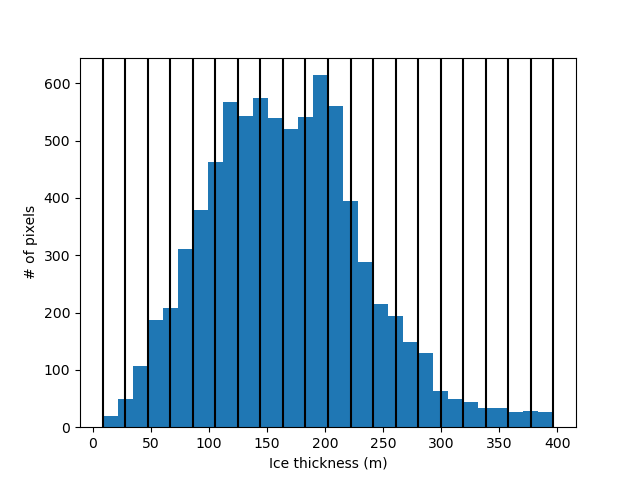

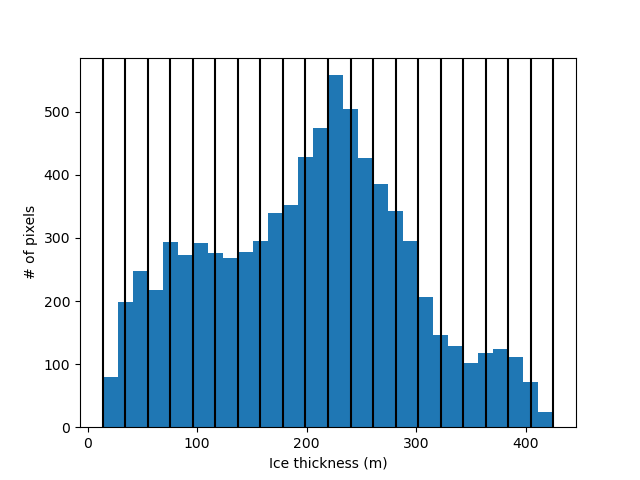

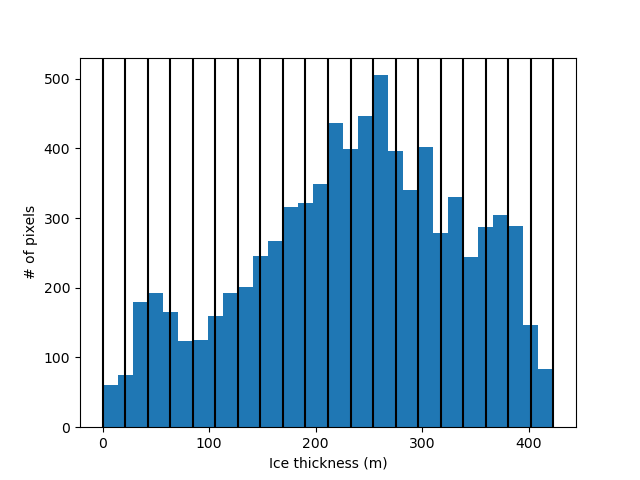

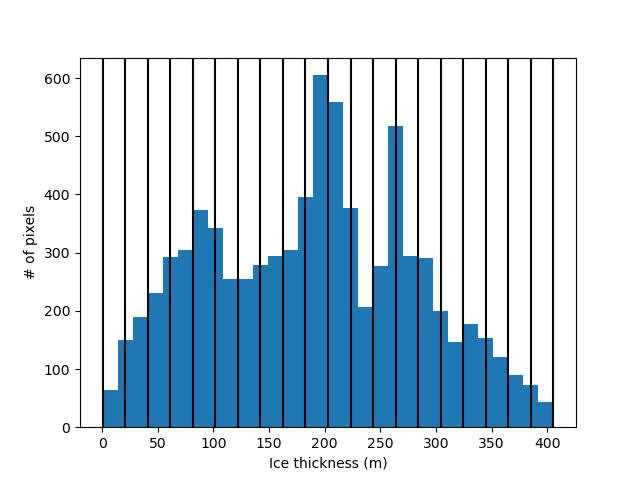

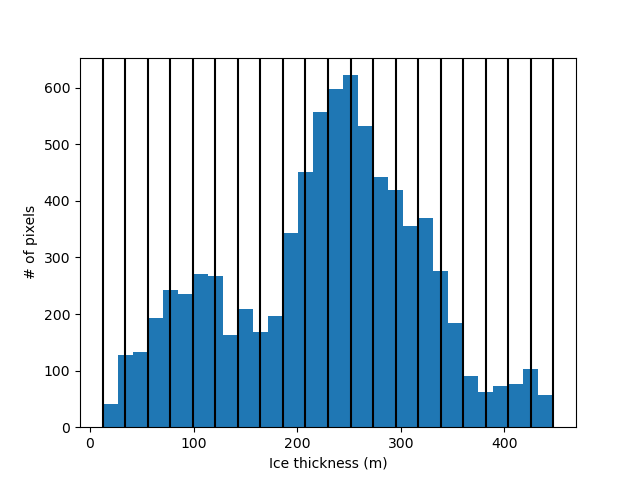

In [46]:
res = geolib.get_res(ds_list[0])[0]
num_thic_div_divq2 = 20
lengthscale_factor = 5
flux_models = []
for idx,model in enumerate(H_list):
    px_indices,lengtscales = glac_dyn.thickness_division(model,n=num_thic_div_divq2,factor=[lengthscale_factor],
                                                         res=res)
    flux_models.append(glac_dyn.compute_simple_flux_div(vx,vy,model,v_col_f=0.8,
        dx=res,dy=res,eo=1,smooth=True,px_lengthscale=lengtscales,lookup_indexes=px_indices))

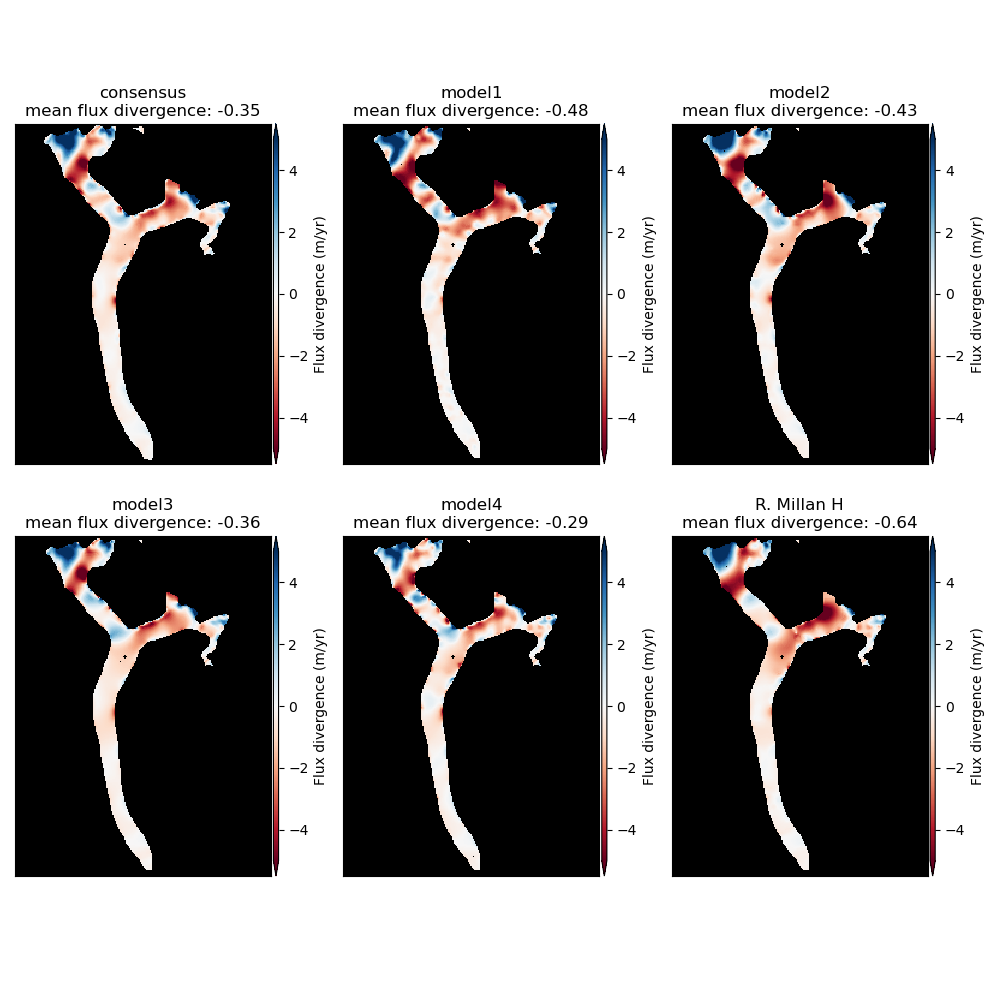

In [47]:
f,ax = plt.subplots(2,3,figsize=(10,10))
axa = ax.ravel()
flux_models = [geospatial.mask_by_shp(glac_shp.geometry,flux,ds=ds_list[0]) for flux in flux_models] 
#common_mask = malib.common_mask(flux_models)
flux_models = [np.ma.array(flux,mask=divq2_consensus.mask) for flux in flux_models]
models_title = ['consensus','model1','model2','model3','model4','R. Millan H']
cmap = 'RdBu'
clim = (-5,5)
label = 'Flux divergence (m/yr)'
for idx,flux in enumerate([divq2_consensus]+flux_models):
    
    mean = flux.mean()
    plt_title = f"{models_title[idx]}\nmean flux divergence: {mean :.2f}"
    pltlib.iv(flux,ax=axa[idx],cmap=cmap,clim=clim,label=label,title=plt_title)


Lengthscales in m: [116.54562950134277, 213.20981979370117, 321.2134552001953, 427.9206848144531, 539.7009658813477, 644.0854644775391, 755.8489227294922, 865.2825927734375, 980.3939819335938, 1083.0227661132812, 1195.6896209716797, 1301.7269897460938, 1411.5556335449219, 1517.1807861328125, 1633.6257934570312, 1734.0957641601562, 1842.9428100585938, 1966.2417602539062, 2080.5410766601562, 2168.8018798828125]
Lengthscales in pixels: [ 2.34  4.26  6.42  8.56 10.8  12.88 15.12 17.3  19.6  21.66 23.92 26.04
 28.24 30.34 32.68 34.68 36.86 39.32 41.62 43.38]
Applying gaussian smoothing filter with size 3 and sigma 0.333 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 5 and sigma 0.667 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 7 and sigma 1.000 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 9 and sigma 1.333 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 11 

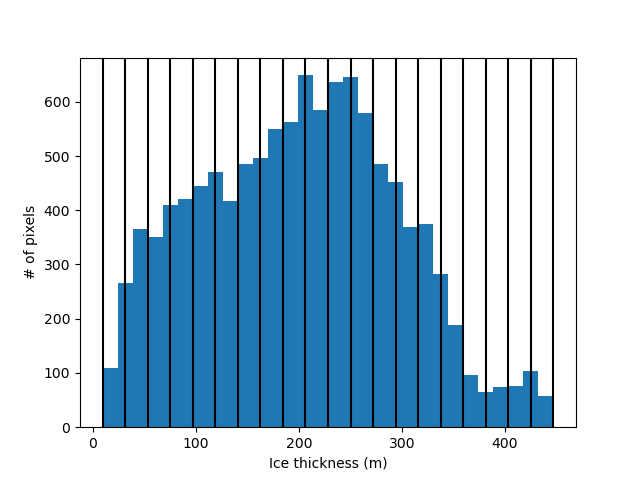

In [48]:
px_indices,lengtscales = glac_dyn.thickness_division(millan_H,n=num_thic_div_divq2,factor=[lengthscale_factor],
                                                     res=res)
millan_flux_v_h = glac_dyn.compute_simple_flux_div(vx_millan,vy_millan,millan_H,v_col_f=0.8,
        dx=res,dy=res,eo=1,smooth=True,px_lengthscale=lengtscales,lookup_indexes=px_indices)

Text(0.5, 1.0, 'Millan H & V\nmean flux divergence: -1.77')

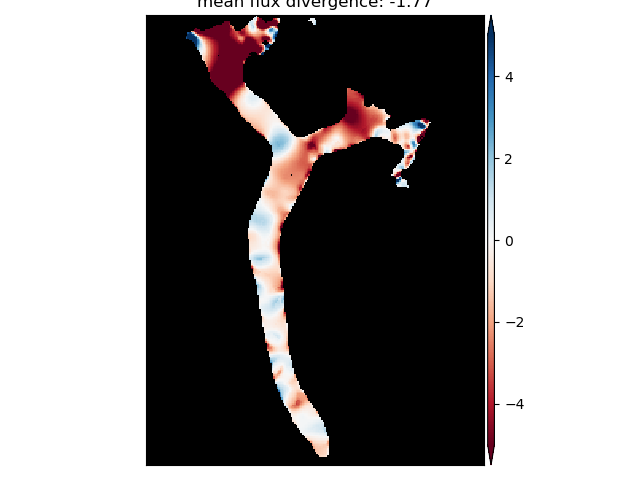

In [49]:
f,ax = plt.subplots()


millan_flux_v_h = np.ma.array(millan_flux_v_h,mask=divq2_consensus.mask)
mean = millan_flux_v_h.mean()
pltlib.iv(millan_flux_v_h,ax=ax,cmap=cmap,clim=clim)
plt_title = f"Millan H & V\nmean flux divergence: {mean :.2f}"
ax.set_title(plt_title)

## unweighted std

In [50]:
len(flux_models[:-1])

4

In [51]:
np.ma.mean(np.ma.std(np.ma.dstack(flux_models[:-1]),axis=2))

0.5440195205907443

In [52]:
%matplotlib inline

<Axes: >

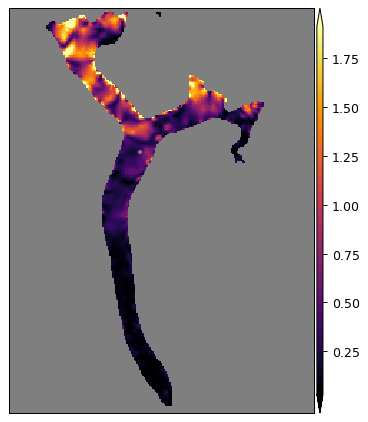

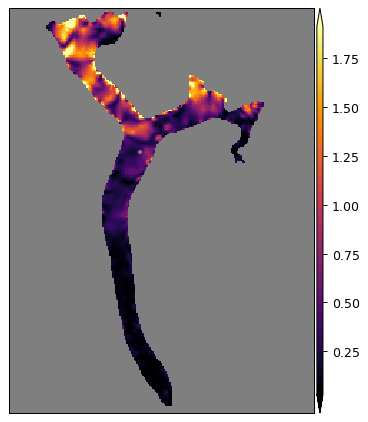

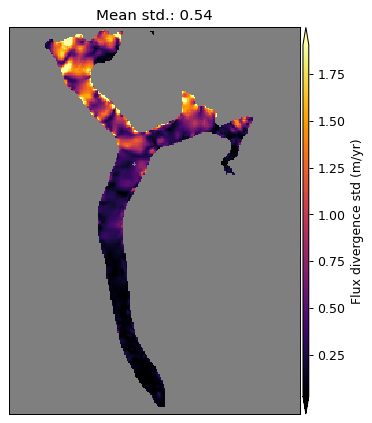

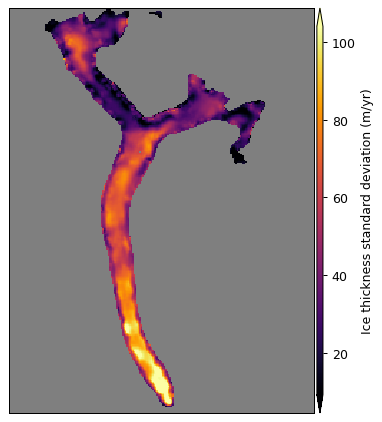

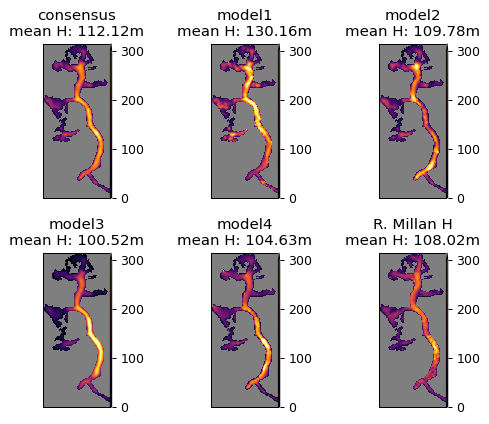

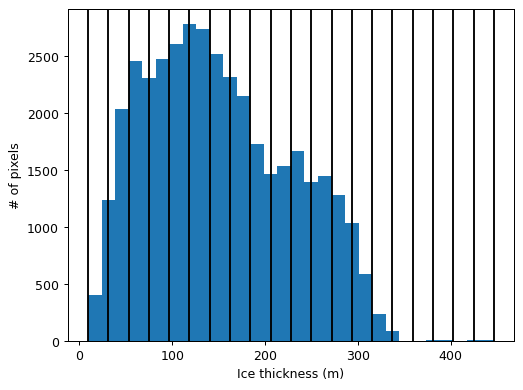

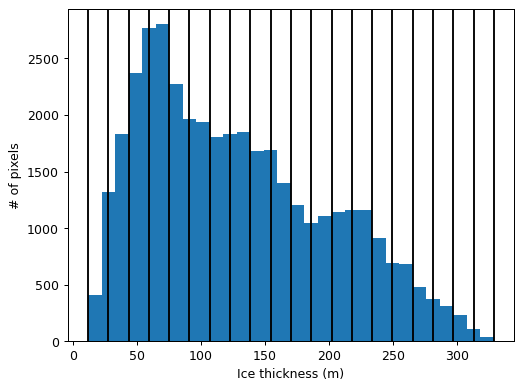

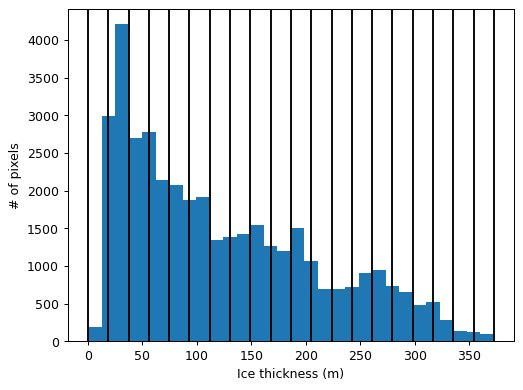

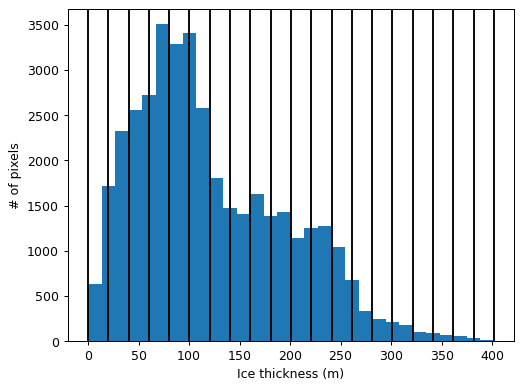

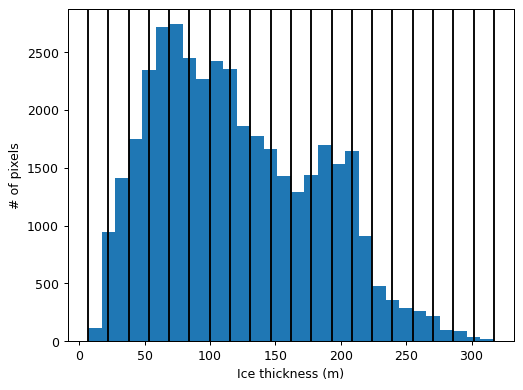

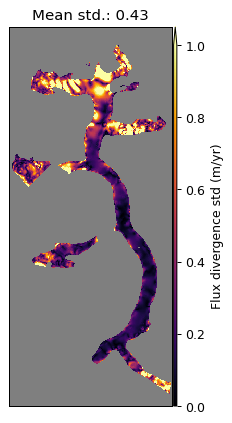

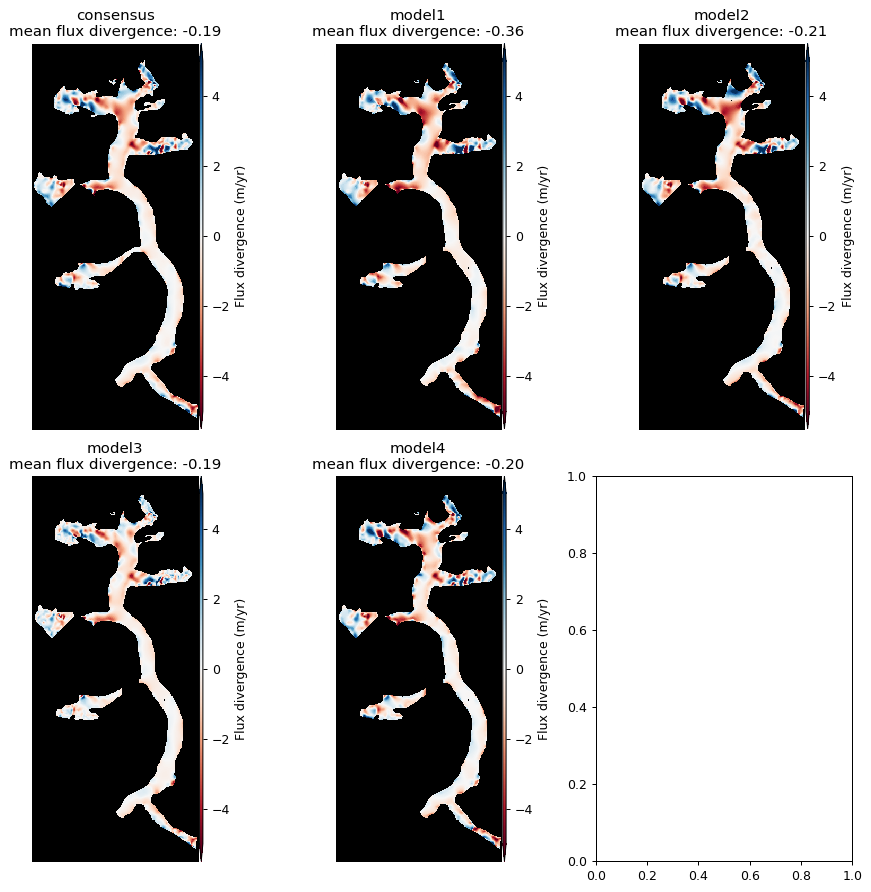

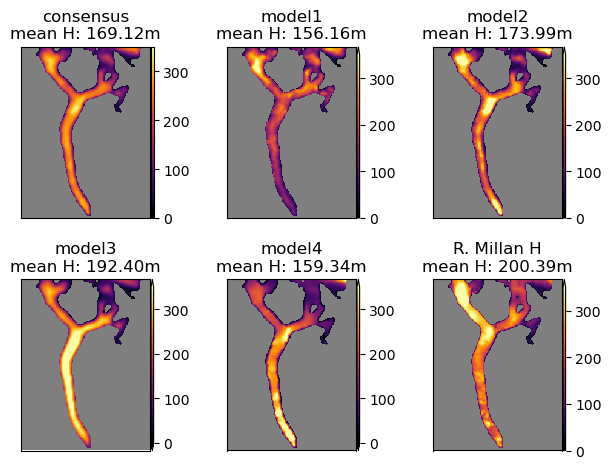

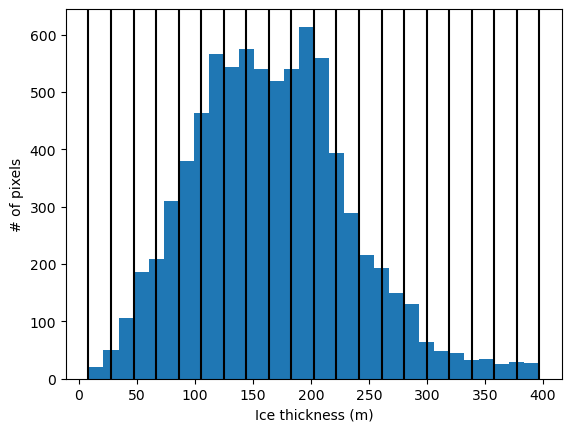

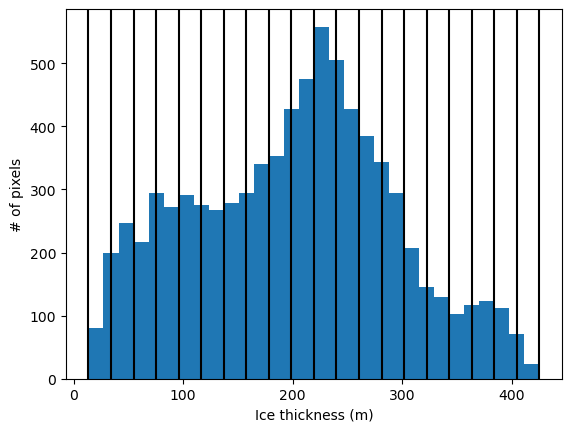

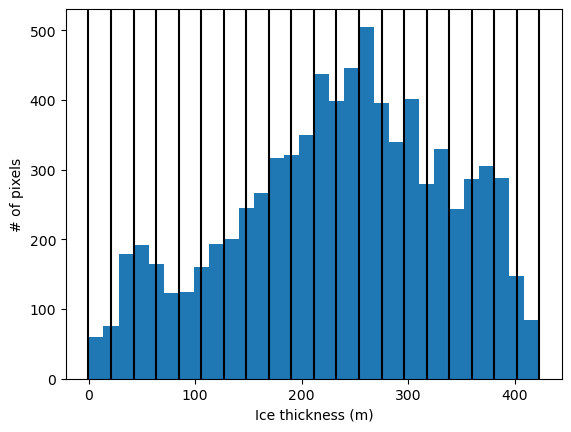

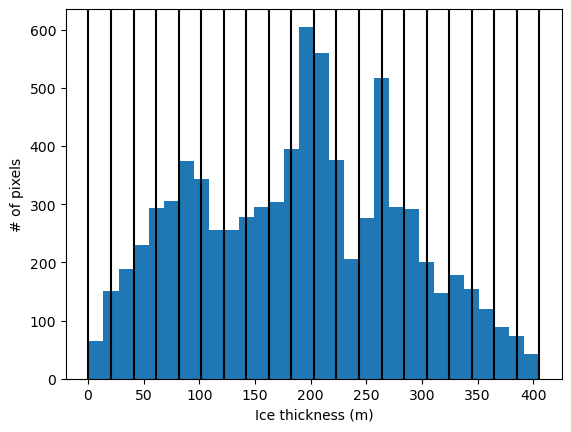

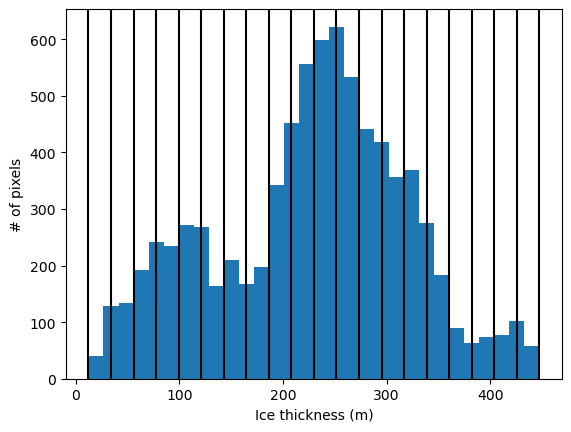

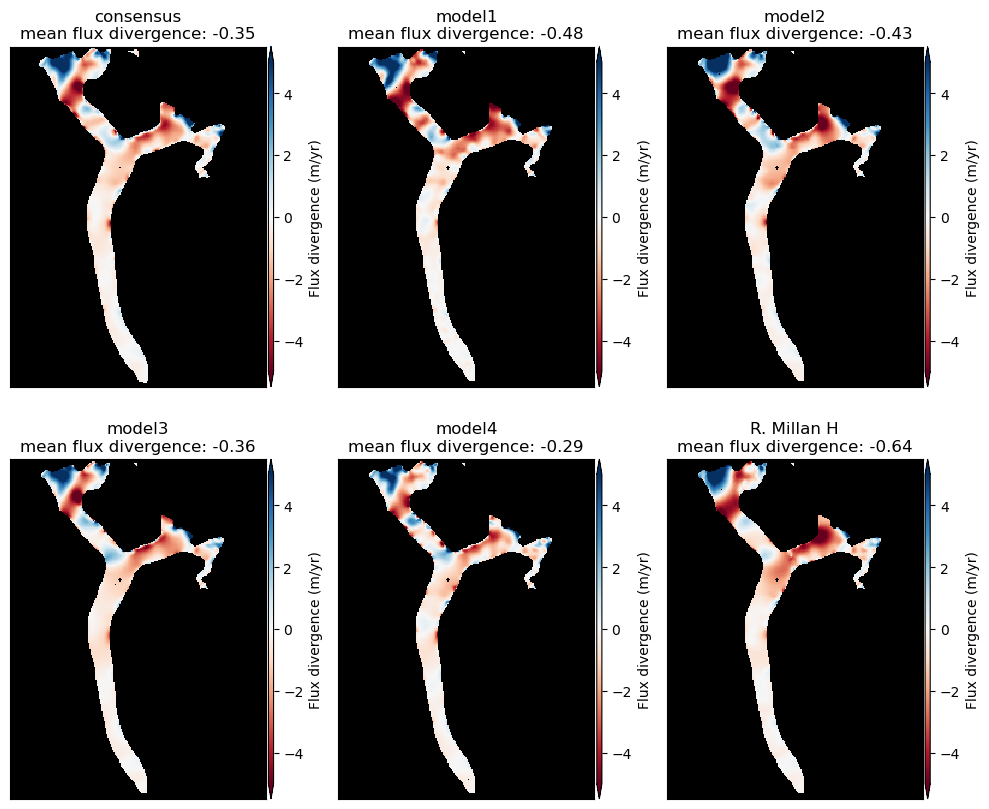

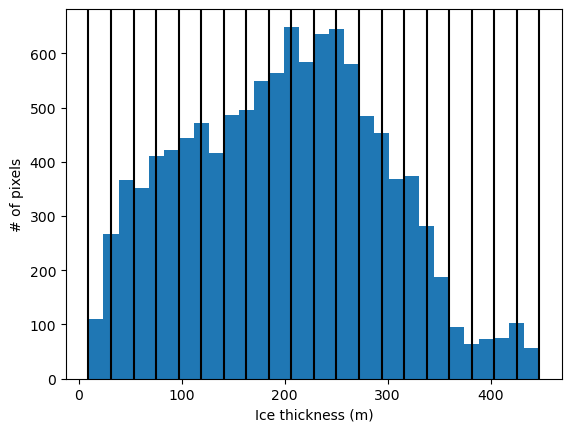

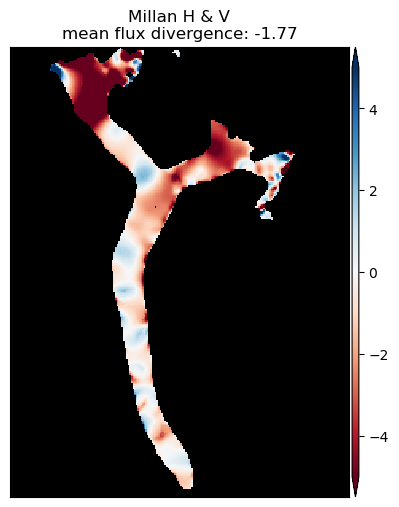

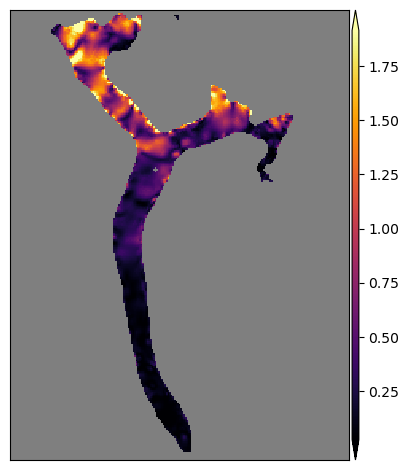

In [53]:
f,ax = plt.subplots()

pltlib.iv(np.ma.std(np.ma.dstack(flux_models[:-1]),axis=2),ax=ax,cmap='inferno')

## weighted std

In [54]:
weights = np.array([0.22,0.19,0.18,0.28])
print(weights.sum())
norm_weights = weights/weights.sum()
print(norm_weights.sum())

0.8700000000000001
1.0


In [55]:
#https://stackoverflow.com/questions/2413522/weighted-standard-deviation-in-numpy

In [56]:
def compute_stack_wt_std(flux_models,norm_weights=norm_weights):
    #https://stackoverflow.com/questions/2413522/weighted-standard-deviation-in-numpy
    flux_models = np.ma.stack(flux_models)
    wt_average = np.ma.average(flux_models,axis=0,weights=norm_weights)
    variance = np.ma.average((flux_models-wt_average)**2,axis=0, weights=norm_weights)
    std = np.ma.sqrt(variance)
    return std

<Axes: title={'center': 'Mean std.: 0.54'}>

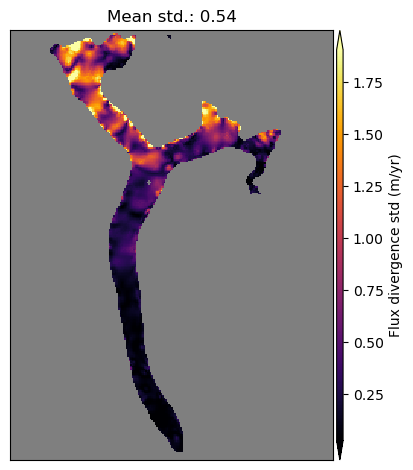

In [57]:
f,ax = plt.subplots()
stack_std = compute_stack_wt_std(flux_models[:-1])
mean = np.ma.mean(stack_std)
pltlib.iv(stack_std,ax=ax,cmap='inferno',title=f'Mean std.: {mean :.2f}' ,label='Flux divergence std (m/yr)')

In [58]:
ngozumpa_std = stack_std

In [59]:
div_q2_consensus_std_fn = os.path.splitext(divq2_concensus_fn)[0]+"_std_div.tif"
iolib.writeGTiff(stack_std,div_q2_consensus_std_fn,src_ds=ds_list[-1])

<Axes: title={'center': 'Mean std.: 0.57'}>

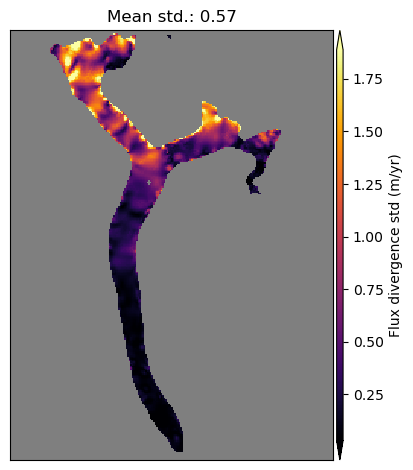

In [60]:
f,ax = plt.subplots()
stdq = np.ma.std(np.ma.stack(flux_models),axis=0)
mean = np.ma.mean(stdq)
pltlib.iv(stdq,ax=ax,cmap='inferno',title=f'Mean std.: {mean :.2f}' ,label='Flux divergence std (m/yr)')

In [61]:
len(H_list)

5

In [62]:
type(H_list)

list

<Axes: >

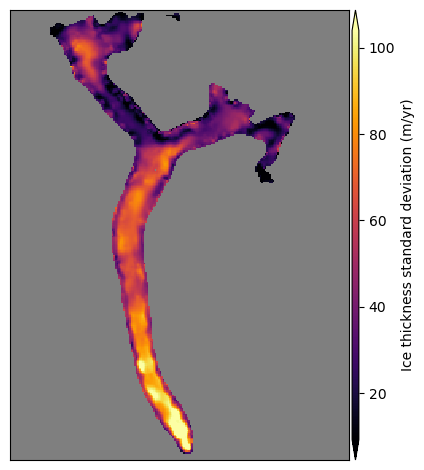

In [63]:
f,ax = plt.subplots()
pltlib.iv(compute_stack_wt_std(H_list[:-1],norm_weights=norm_weights),ax=ax,cmap='inferno',label='Ice thickness standard deviation (m/yr)')

In [ ]:
np.ma.sqrt(variance).mean()

In [ ]:
melt_df = pd.read_csv('ngozumpa_farinotti_2012-12-23_to_2015-01-15_altitudnal_meltstats.csv')
area_wt_mb = (melt_df['area_total']*melt_df['med_total_dhdt']).sum()/(melt_df['area_total'].sum())

In [ ]:
area_wt_mb

In [302]:
(0.19/1.27)*100

14.960629921259844

In [323]:
1.77/0.35

5.057142857142858

## Langtang

In [65]:
%cd /nobackup/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/Langtang/SMB_data/

/nobackupp11/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/Langtang/SMB_data


In [66]:
glac_name = 'langtang'
model1_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model2_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model3_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model4_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_4/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"

In [67]:


vx_fn = '20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip_1.tif'
vy_fn = '20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip_1.tif'
divq2_concensus_fn = 'langtang_farinotti_2015-02-22_to_2016-01-07_divQ2.tif'
glac_shp = gpd.read_file(constants.fetch_glac_shp(constants.rgi_dicts[glac_name])).to_crs("EPSG:32645")
H_fn = constants.fetch_farinotti_thickness(glac_name)
millan_H_fn = constants.fetch_millan_thickness(glac_name)
ds_list = warplib.memwarp_multi_fn([H_fn,model1_H_fn,model2_H_fn,model3_H_fn,model4_H_fn,millan_H_fn,vx_fn,vy_fn,divq2_concensus_fn],extent='last')
H,model1,model2,model3,model4,millan_H,vx,vy,divq2_consensus = [iolib.ds_getma(ds) for ds in ds_list]


Warping all inputs to the following:
Resolution: 25.0
Extent: [368087.5, 3121737.5, 375912.5, 3139937.5]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 9: /nobackupp11/sbhusha1/reference_data/farinotti_2019_ice_thickness/RGI60-15/RGI60-15.04121_thickness.tif
nl: 728 ns: 313 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...2 of 9: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_RGI60-15.04121.tif
nl: 728 ns: 313 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...3 of 9: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_RGI60-15.04121.tif
nl: 728 ns: 313 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...4 of 9: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_RGI60-15.04121.tif
nl: 728 ns: 313 res: 25.000
100 - done.
0...10.

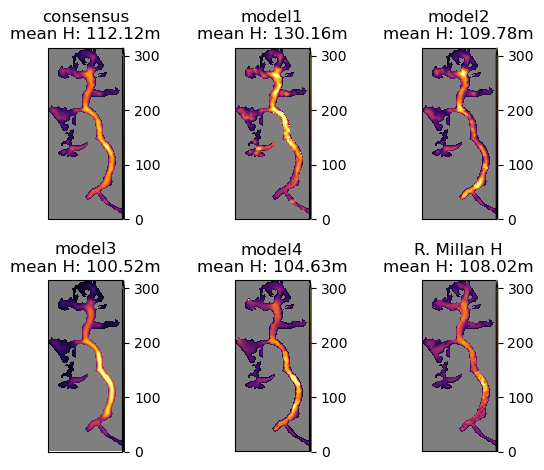

In [68]:
f,ax = plt.subplots(2,3)
models_title = ['consensus','model1','model2','model3','model4','R. Millan H']


h_models = [H,model1,model2,model3,model4,millan_H]
common_mask = malib.common_mask(h_models)
for idx,axa in enumerate(ax.ravel()):
    h = np.ma.array(h_models[idx],mask=common_mask)
    mean = np.ma.mean(h)
    plt_title = f"{models_title[idx]}\nmean H: {mean :.2f}m"
    pltlib.iv(h,ax=axa,cmap='inferno',clim=(0,300),title=plt_title)
    

In [69]:
H_list = [model1,model2,model3,model4,millan_H]
H_mask = malib.common_mask(H_list+[vx,vy,divq2_consensus])
H_list = [np.ma.array(H,mask=H_mask) for H in H_list]

In [70]:
for H in H_list:
    print(H.shape)


(728, 313)
(728, 313)
(728, 313)
(728, 313)
(728, 313)


Lengthscales in m: [125.03637313842773, 218.73458862304688, 318.3445358276367, 432.64591217041016, 538.3934020996094, 645.8601379394531, 756.5179443359375, 864.7157287597656, 972.2343444824219, 1085.8870697021484, 1190.9671783447266, 1305.2253723144531, 1406.9561767578125, 1508.1784057617188, 1617.0497131347656, 1698.2240295410156, 1867.2756958007812, 1950.1969909667969, 2067.5682067871094, 2164.1949462890625]
Lengthscales in pixels: [ 5.    8.76 12.72 17.32 21.52 25.84 30.28 34.6  38.88 43.44 47.64 52.2
 56.28 60.32 64.68 67.92 74.68 78.   82.72 86.56]
Applying gaussian smoothing filter with size 5 and sigma 0.667 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 9 and sigma 1.333 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 13 and sigma 2.000 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 17 and sigma 2.667 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 2

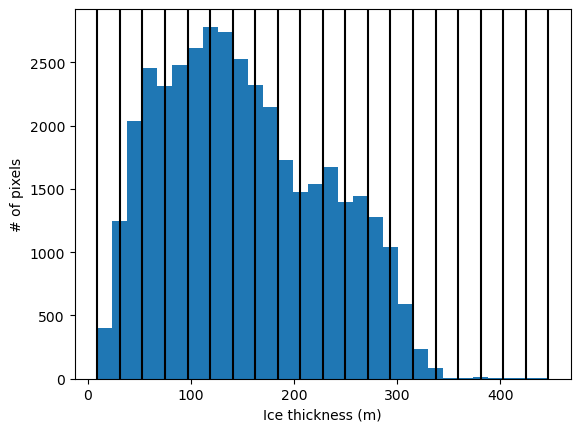

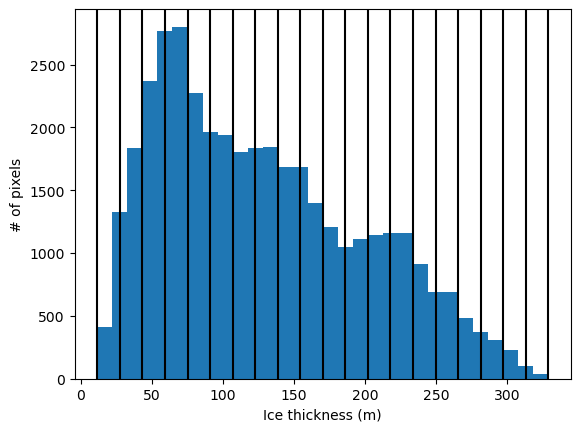

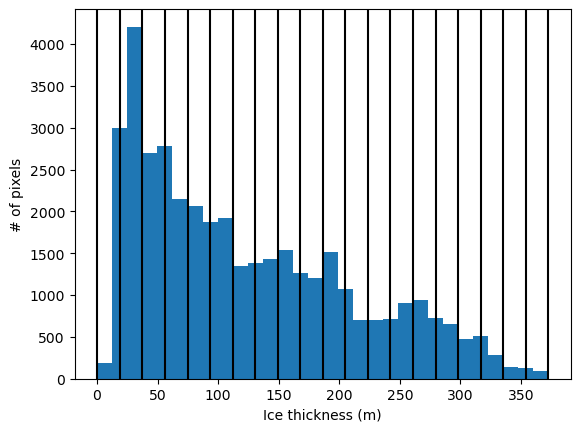

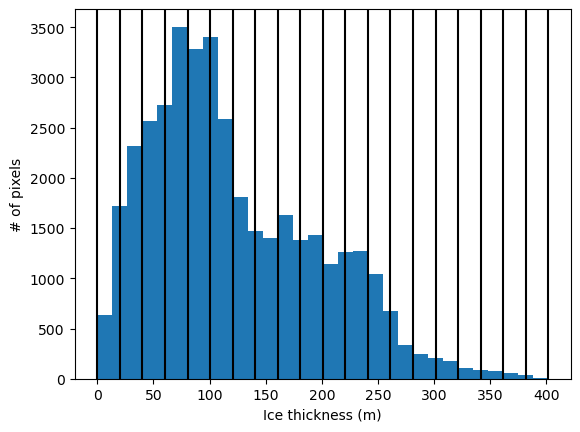

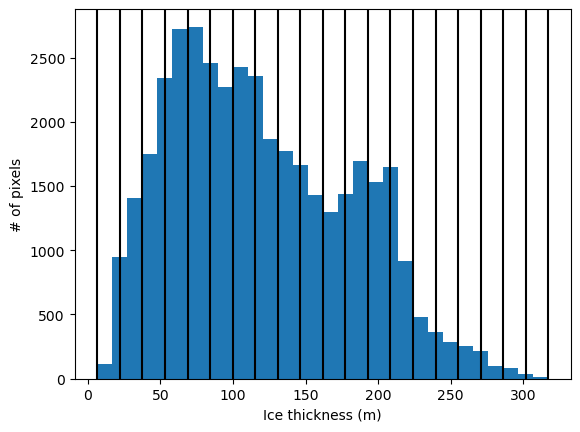

In [71]:
res = geolib.get_res(ds_list[0])[0]
num_thic_div_divq2 = 20
lengthscale_factor = 5
flux_models = []
for idx,model in enumerate(H_list):
    px_indices,lengtscales = glac_dyn.thickness_division(model,n=num_thic_div_divq2,factor=[lengthscale_factor],
                                                         res=res)
    flux_models.append(glac_dyn.compute_simple_flux_div(vx,vy,model,v_col_f=0.8,
        dx=res,dy=res,eo=1,smooth=True,px_lengthscale=lengtscales,lookup_indexes=px_indices))

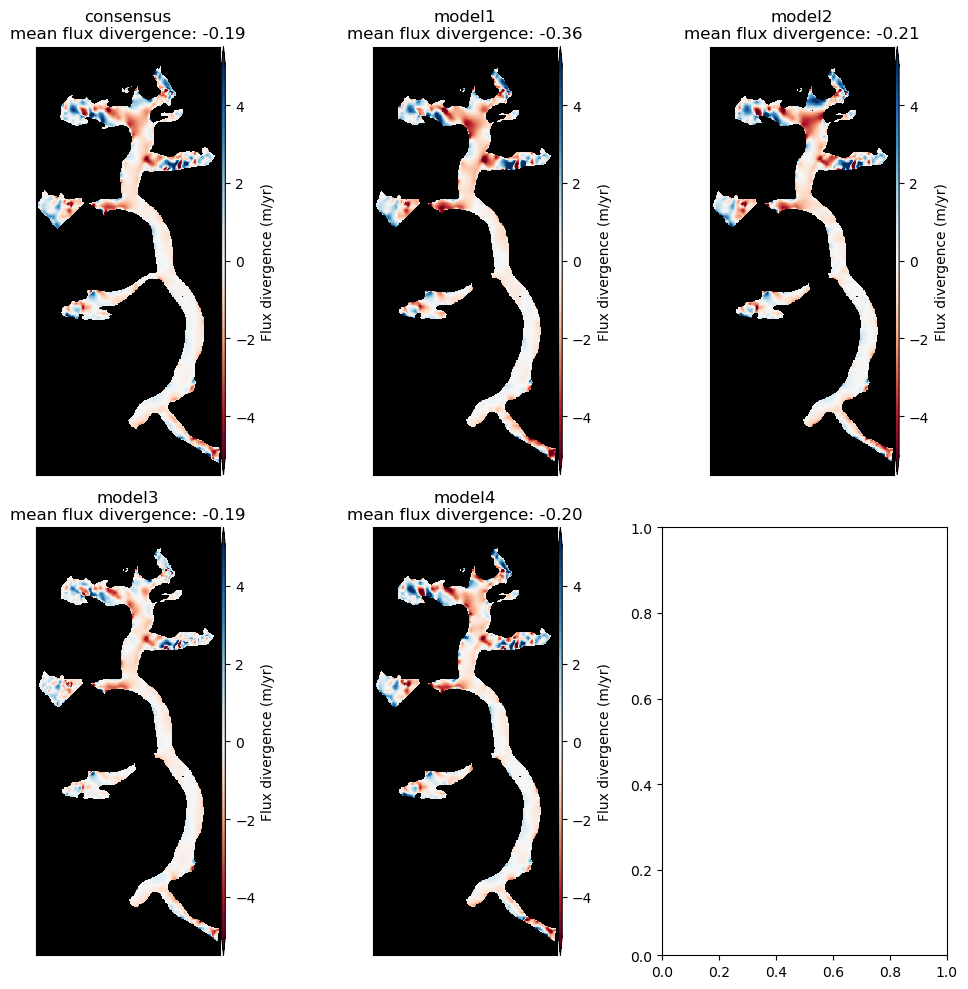

In [72]:
f,ax = plt.subplots(2,3,figsize=(10,10))
axa = ax.ravel()
flux_models = [geospatial.mask_by_shp(glac_shp.geometry,flux,ds=ds_list[0]) for flux in flux_models] 
#common_mask = malib.common_mask(flux_models)
flux_models = [np.ma.array(flux,mask=divq2_consensus.mask) for flux in flux_models]
models_title = ['consensus','model1','model2','model3','model4','R. Millan H']
cmap = 'RdBu'
clim = (-5,5)
label = 'Flux divergence (m/yr)'
for idx,flux in enumerate([divq2_consensus]+flux_models[:-1]):
    
    mean = flux.mean()
    plt_title = f"{models_title[idx]}\nmean flux divergence: {mean :.2f}"
    pltlib.iv(flux,ax=axa[idx],cmap=cmap,clim=clim,label=label,title=plt_title)


<Axes: title={'center': 'Mean std.: 0.43'}>

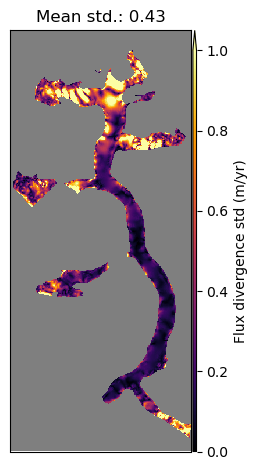

In [73]:
f,ax = plt.subplots()
stack_std = compute_stack_wt_std(flux_models[:-1])
mean = np.ma.mean(stack_std)
pltlib.iv(stack_std,ax=ax,cmap='inferno',title=f'Mean std.: {mean :.2f}' ,label='Flux divergence std (m/yr)',clim=(0,1))

In [74]:
div_q2_consensus_std_fn = os.path.splitext(divq2_concensus_fn)[0]+"_std_div.tif"
iolib.writeGTiff(stack_std,div_q2_consensus_std_fn,src_ds=ds_list[-1])

In [75]:
langtang_std = stack_std

In [76]:
melt_df = pd.read_csv('langtang_farinotti_2015-02-22_to_2016-01-07_altitudnal_meltstats.csv')
area_wt_mb = (melt_df['area_total']*melt_df['med_total_dhdt']).sum()/(melt_df['area_total'].sum())
area_wt_mb

-1.1217230728561702

In [77]:
-0.36+0.19

-0.16999999999999998

In [78]:
((0.17)/(1.13))*100

15.04424778761062

In [79]:
    flux_models = np.ma.stack(flux_models)

## Imja Lhotse Shar

In [80]:
%cd /nobackup/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/ImjaLhotseShar/SMB_data/

/nobackupp11/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/ImjaLhotseShar/SMB_data


In [81]:
glac_name = 'imja'
model1_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model2_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model3_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model4_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_4/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"

In [82]:




vx_fn = '20151002_combined_hs_masked__20161029_combined_hs_masked_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip_1.tif'
vy_fn = '20151002_combined_hs_masked__20161029_combined_hs_masked_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip_1.tif'
divq2_concensus_fn = 'imja_farinotti_2015-10-02_to_2016-10-29_divQ2.tif'
glac_shp = gpd.read_file(constants.fetch_glac_shp(constants.rgi_dicts[glac_name])).to_crs("EPSG:32645")
H_fn = constants.fetch_farinotti_thickness(glac_name)
millan_H_fn = constants.fetch_millan_thickness(glac_name)
ds_list = warplib.memwarp_multi_fn([H_fn,model1_H_fn,model2_H_fn,model3_H_fn,model4_H_fn,millan_H_fn,vx_fn,vy_fn,divq2_concensus_fn],extent='last')
H,model1,model2,model3,model4,millan_H,vx,vy,divq2_consensus = [iolib.ds_getma(ds) for ds in ds_list]


Warping all inputs to the following:
Resolution: 25.0
Extent: [492962.5, 3084912.5, 498337.5, 3092462.5]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 9: /nobackupp11/sbhusha1/reference_data/farinotti_2019_ice_thickness/RGI60-15/RGI60-15.03743_thickness.tif
nl: 302 ns: 215 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...2 of 9: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_RGI60-15.03743.tif
nl: 302 ns: 215 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...3 of 9: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_RGI60-15.03743.tif
nl: 302 ns: 215 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...4 of 9: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_RGI60-15.03743.tif
nl: 302 ns: 215 res: 25.000
100 - done.
0...10.

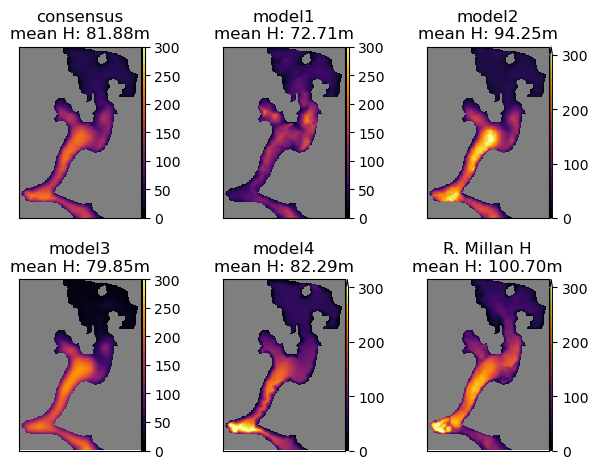

In [83]:
f,ax = plt.subplots(2,3)
models_title = ['consensus','model1','model2','model3','model4','R. Millan H']


h_models = [H,model1,model2,model3,model4,millan_H]
common_mask = malib.common_mask(h_models)
for idx,axa in enumerate(ax.ravel()):
    h = np.ma.array(h_models[idx],mask=common_mask)
    mean = np.ma.mean(h)
    plt_title = f"{models_title[idx]}\nmean H: {mean :.2f}m"
    pltlib.iv(h,ax=axa,cmap='inferno',clim=(0,300),title=plt_title)
    

In [84]:
H_list = [model1,model2,model3,model4,millan_H]
H_mask = malib.common_mask(H_list+[vx,vy,divq2_consensus])
H_list = [np.ma.array(H,mask=H_mask) for H in H_list]

In [85]:
divq2_consensus.mean()

-0.2943231624965109

Lengthscales in m: [78.92184734344482, 118.90510559082031, 162.7176856994629, 205.2936553955078, 250.39554595947266, 296.1771774291992, 342.8883361816406, 387.9796600341797, 433.31775665283203, 479.0827941894531, 522.9673767089844, 570.9585189819336, 618.6566925048828, 660.0595855712891, 707.9014587402344, 751.1792755126953, 797.4410247802734, 844.1909027099609, 887.5394439697266, 931.5439605712891]
Lengthscales in pixels: [ 3.16  4.76  6.52  8.2  10.   11.84 13.72 15.52 17.32 19.16 20.92 22.84
 24.76 26.4  28.32 30.04 31.88 33.76 35.52 37.28]
Applying gaussian smoothing filter with size 3 and sigma 0.333 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 5 and sigma 0.667 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 7 and sigma 1.000 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 9 and sigma 1.333 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 11 and sigma 

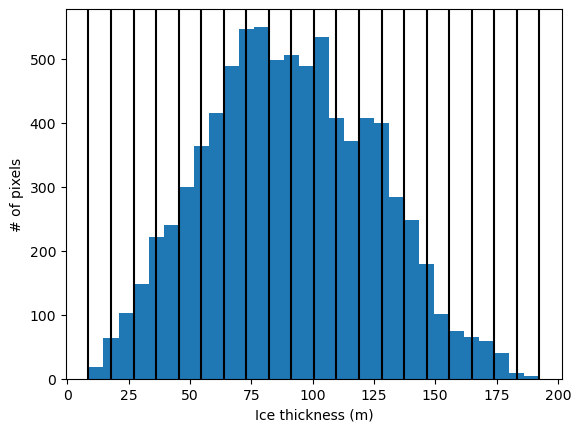

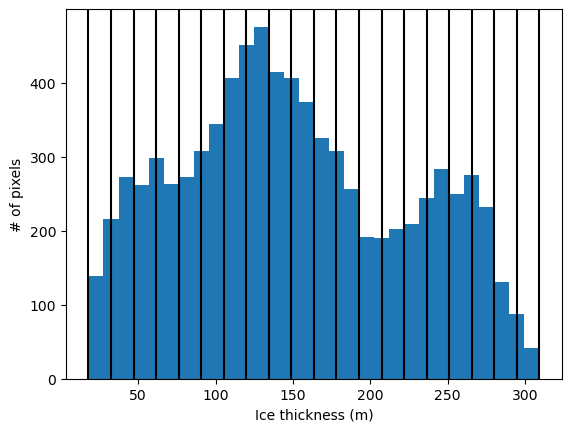

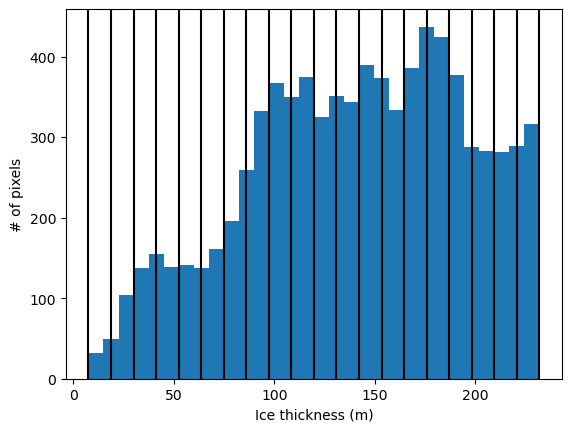

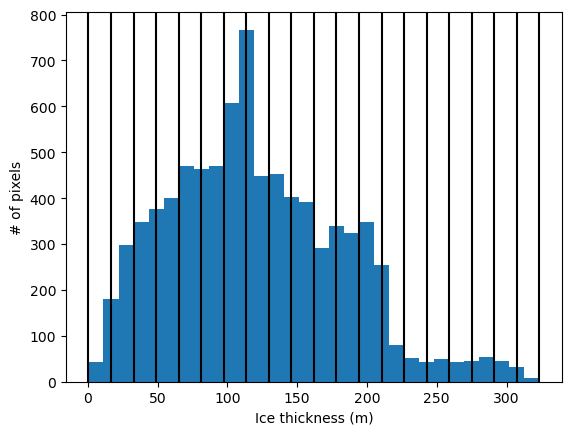

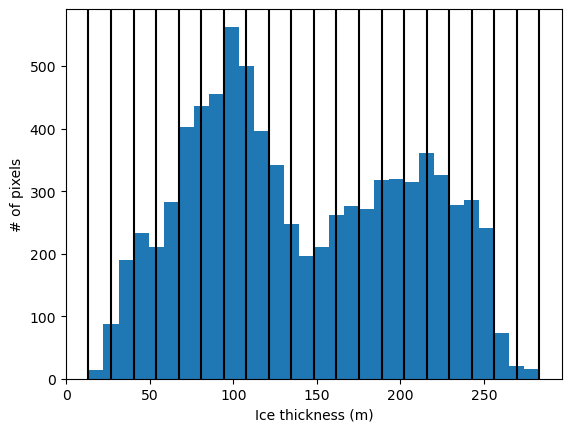

In [86]:
res = geolib.get_res(ds_list[0])[0]
num_thic_div_divq2 = 20
lengthscale_factor = 5
flux_models = []
for idx,model in enumerate(H_list):
    px_indices,lengtscales = glac_dyn.thickness_division(model,n=num_thic_div_divq2,factor=[lengthscale_factor],
                                                         res=res)
    flux_models.append(glac_dyn.compute_simple_flux_div(vx,vy,model,v_col_f=0.8,
        dx=res,dy=res,eo=1,smooth=True,px_lengthscale=lengtscales,lookup_indexes=px_indices))

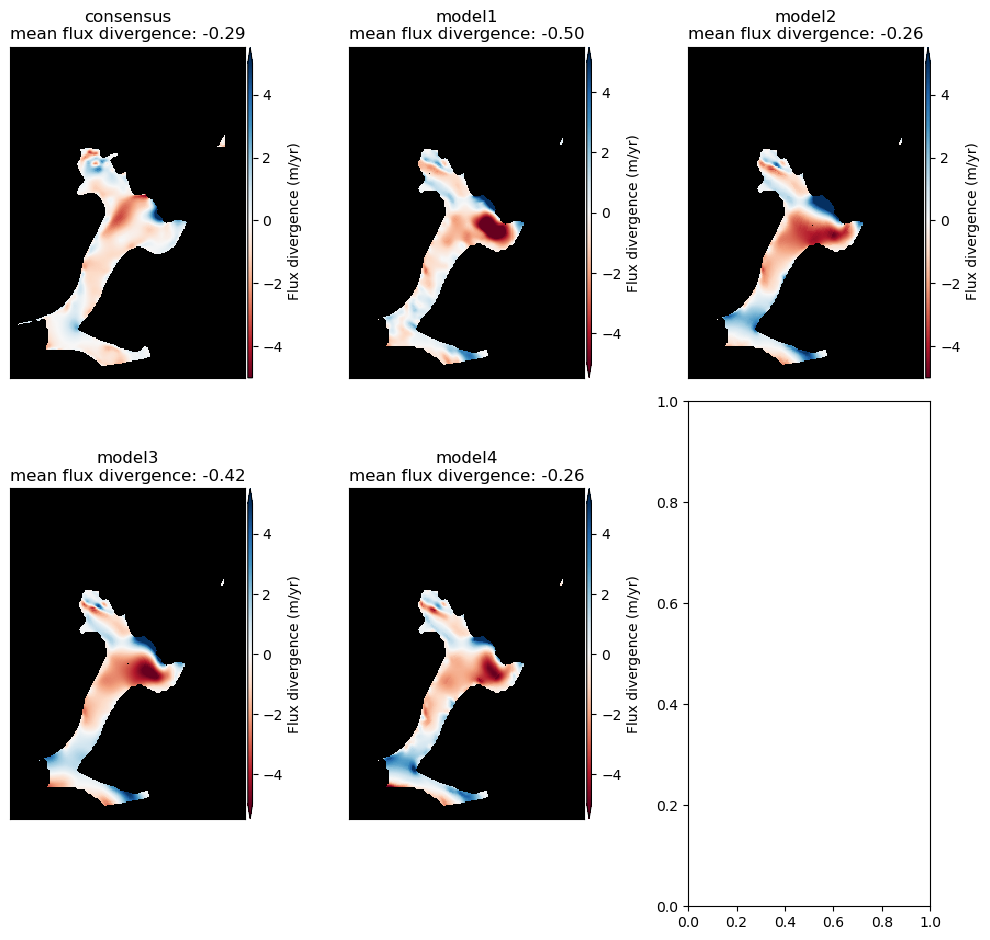

In [87]:
f,ax = plt.subplots(2,3,figsize=(10,10))
axa = ax.ravel()
flux_models = [geospatial.mask_by_shp(glac_shp.geometry,flux,ds=ds_list[0]) for flux in flux_models] 
#common_mask = malib.common_mask(flux_models)
flux_models = [np.ma.array(flux,mask=divq2_consensus.mask) for flux in flux_models]
models_title = ['consensus','model1','model2','model3','model4','R. Millan H']
cmap = 'RdBu'
clim = (-5,5)
label = 'Flux divergence (m/yr)'
for idx,flux in enumerate([divq2_consensus]+flux_models[:-1]):
    
    mean = flux.mean()
    plt_title = f"{models_title[idx]}\nmean flux divergence: {mean :.2f}"
    pltlib.iv(flux,ax=axa[idx],cmap=cmap,clim=clim,label=label,title=plt_title)


In [88]:
melt_df = pd.read_csv('imja_farinotti_2015-10-02_to_2016-10-29_altitudnal_meltstats.csv')
area_wt_mb = (melt_df['area_total']*melt_df['med_total_dhdt']).sum()/(melt_df['area_total'].sum())
area_wt_mb

-0.9362382043388547

In [89]:
(0.24/0.94)*100

25.53191489361702

<Axes: title={'center': 'Mean std.: 0.50'}>

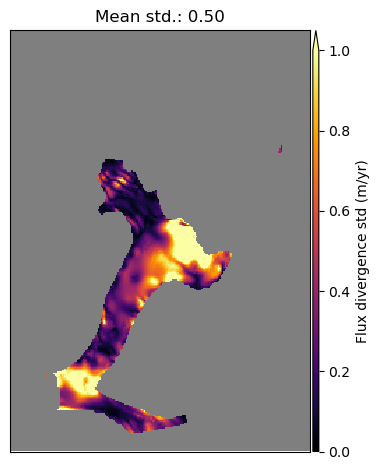

In [90]:
f,ax = plt.subplots()
stack_std = compute_stack_wt_std(flux_models[:-1])
mean = np.ma.mean(stack_std)
pltlib.iv(stack_std,ax=ax,cmap='inferno',title=f'Mean std.: {mean :.2f}' ,label='Flux divergence std (m/yr)',clim=(0,1))

In [91]:
div_q2_consensus_std_fn = os.path.splitext(divq2_concensus_fn)[0]+"_std_div.tif"
iolib.writeGTiff(stack_std,div_q2_consensus_std_fn,src_ds=ds_list[-1])

In [92]:
imja_std = stack_std

## Khumbu

In [93]:
%cd /nobackup/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/Khumbu/SMB_data/

/nobackupp11/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/Khumbu/SMB_data


In [94]:
glac_name = 'khumbu'
model1_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model2_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model3_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model4_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_4/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"

In [95]:


vx_fn = '20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip_b1.tif'
vy_fn = '20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip_b1.tif'
divq2_concensus_fn = 'khumbu_farinotti_2015-11-02_to_2016-10-25_divQ2.tif'
glac_shp = gpd.read_file(constants.fetch_glac_shp(constants.rgi_dicts[glac_name])).to_crs("EPSG:32645")
H_fn = constants.fetch_farinotti_thickness(glac_name)
millan_H_fn = constants.fetch_millan_thickness(glac_name)
ds_list = warplib.memwarp_multi_fn([H_fn,model1_H_fn,model2_H_fn,model3_H_fn,model4_H_fn,millan_H_fn,vx_fn,vy_fn,divq2_concensus_fn],extent='last')
H,model1,model2,model3,model4,millan_H,vx,vy,divq2_consensus = [iolib.ds_getma(ds) for ds in ds_list]


Warping all inputs to the following:
Resolution: 25.0
Extent: [481512.5, 3090512.5, 488437.5, 3099662.5]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 9: /nobackupp11/sbhusha1/reference_data/farinotti_2019_ice_thickness/RGI60-15/RGI60-15.03733_thickness.tif
nl: 366 ns: 277 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...2 of 9: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_RGI60-15.03733.tif
nl: 366 ns: 277 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...3 of 9: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_RGI60-15.03733.tif
nl: 366 ns: 277 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...4 of 9: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_RGI60-15.03733.tif
nl: 366 ns: 277 res: 25.000
100 - done.
0...10.

In [96]:
divq2_consensus.shape

(366, 277)

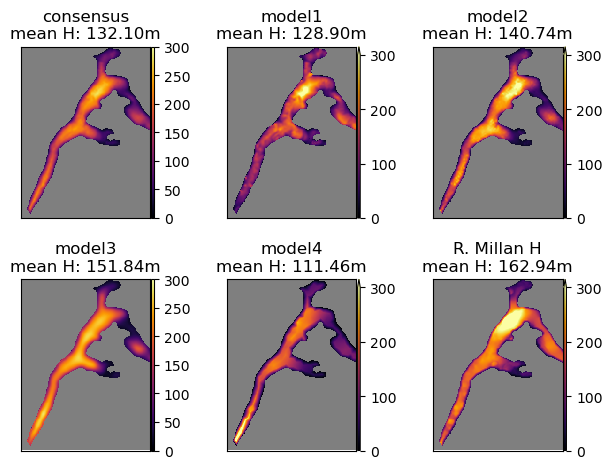

In [97]:
f,ax = plt.subplots(2,3)
models_title = ['consensus','model1','model2','model3','model4','R. Millan H']


h_models = [H,model1,model2,model3,model4,millan_H]
common_mask = malib.common_mask(h_models)
for idx,axa in enumerate(ax.ravel()):
    h = np.ma.array(h_models[idx],mask=common_mask)
    mean = np.ma.mean(h)
    plt_title = f"{models_title[idx]}\nmean H: {mean :.2f}m"
    pltlib.iv(h,ax=axa,cmap='inferno',clim=(0,300),title=plt_title)
    

In [98]:
H_list = [model1,model2,model3,model4,millan_H]
H_mask = malib.common_mask(H_list+[vx,vy,divq2_consensus])
H_list = [np.ma.array(H,mask=H_mask) for H in H_list]

In [99]:
divq2_consensus.mean()

-0.6236283428853103

Lengthscales in m: [135.58274269104004, 204.4065284729004, 280.1986503601074, 361.3812255859375, 439.90821838378906, 522.5595855712891, 602.9804611206055, 681.3639068603516, 762.210693359375, 847.2255706787109, 925.0307464599609, 1001.2342834472656, 1083.9403533935547, 1168.240966796875, 1246.5825653076172, 1331.1300659179688, 1415.7376098632812, 1496.563720703125, 1575.14404296875, 1645.0369262695312]
Lengthscales in pixels: [ 5.44  8.16 11.2  14.44 17.6  20.92 24.12 27.24 30.48 33.88 37.   40.04
 43.36 46.72 49.88 53.24 56.64 59.88 63.   65.8 ]
Applying gaussian smoothing filter with size 5 and sigma 0.667 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 9 and sigma 1.333 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 11 and sigma 1.667 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 15 and sigma 2.333 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 17 and s

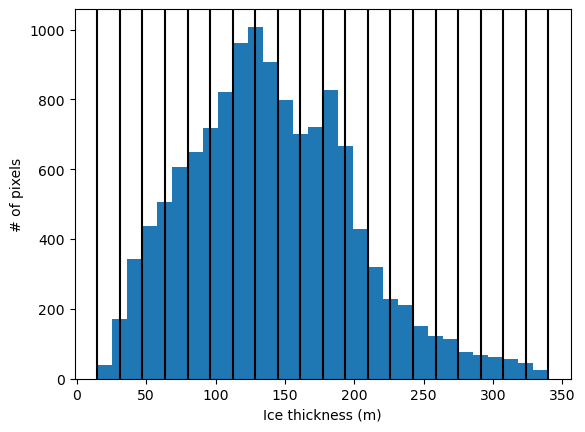

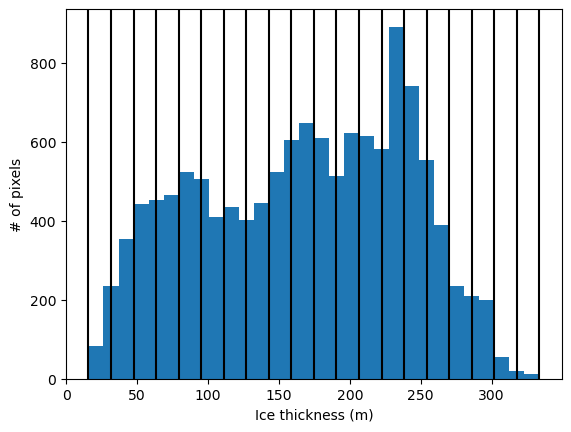

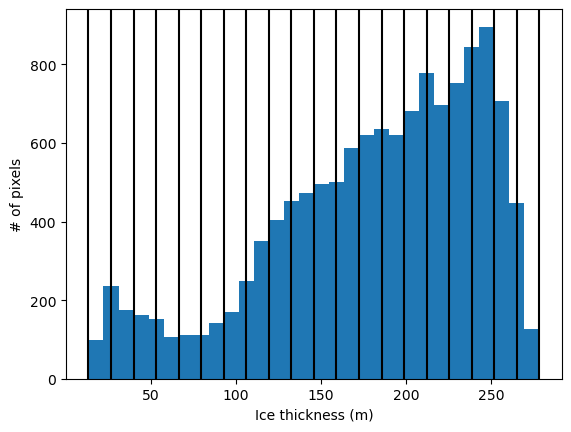

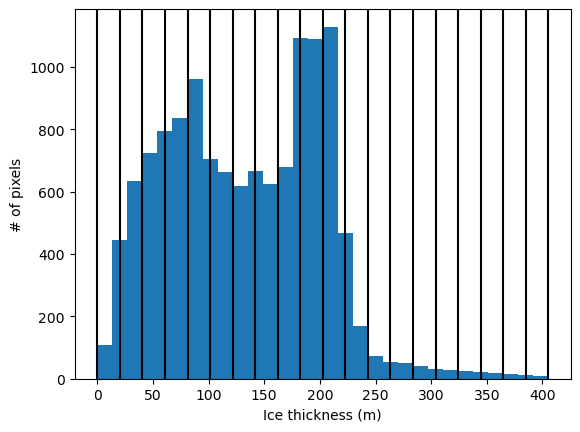

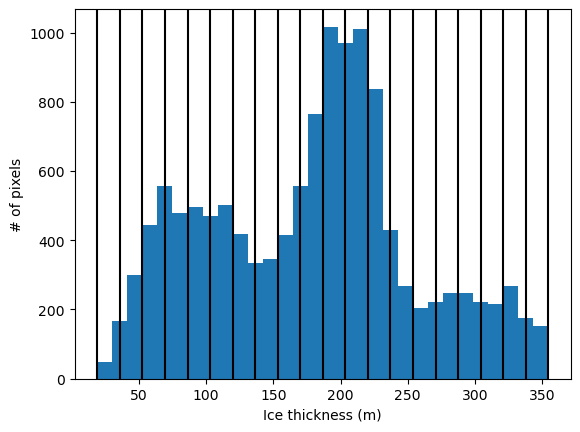

In [100]:
res = geolib.get_res(ds_list[0])[0]
num_thic_div_divq2 = 20
lengthscale_factor = 5
flux_models = []
for idx,model in enumerate(H_list):
    px_indices,lengtscales = glac_dyn.thickness_division(model,n=num_thic_div_divq2,factor=[lengthscale_factor],
                                                         res=res)
    flux_models.append(glac_dyn.compute_simple_flux_div(vx,vy,model,v_col_f=0.8,
        dx=res,dy=res,eo=1,smooth=True,px_lengthscale=lengtscales,lookup_indexes=px_indices))

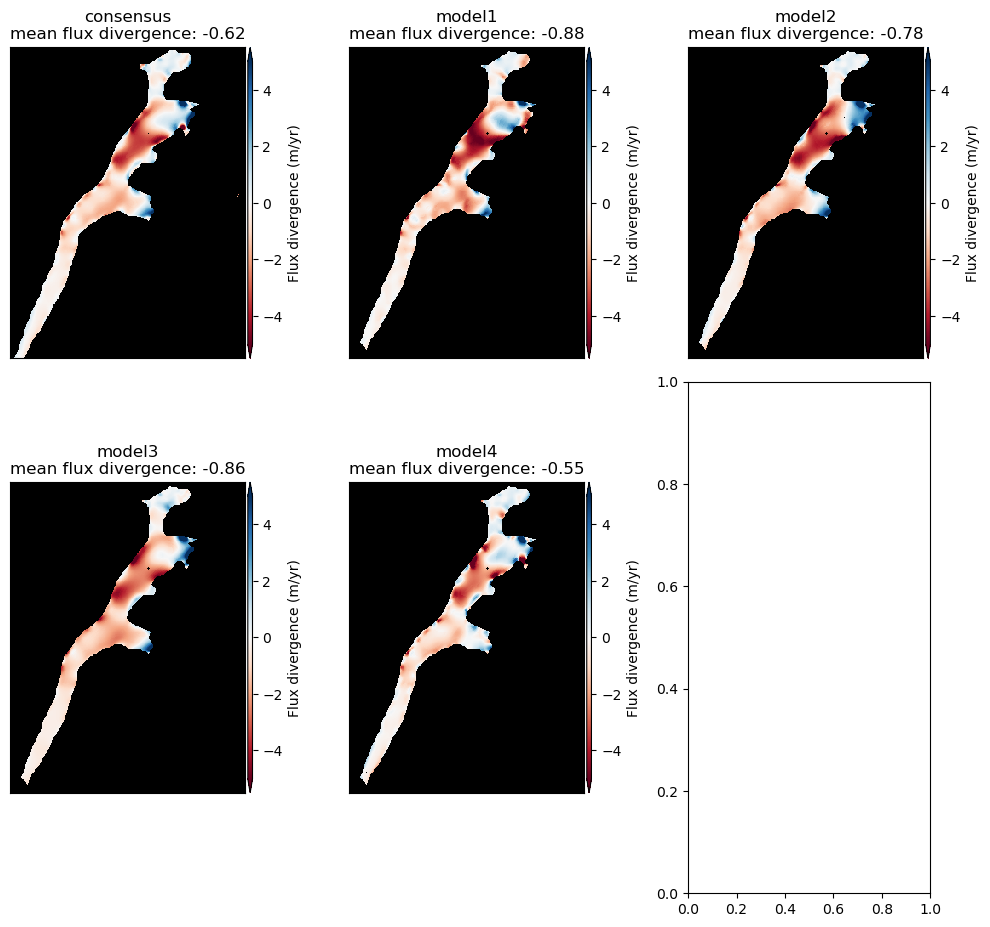

In [101]:
f,ax = plt.subplots(2,3,figsize=(10,10))
axa = ax.ravel()
flux_models = [geospatial.mask_by_shp(glac_shp.geometry,flux,ds=ds_list[0]) for flux in flux_models] 
#common_mask = malib.common_mask(flux_models)
flux_models = [np.ma.array(flux,mask=divq2_consensus.mask) for flux in flux_models]
models_title = ['consensus','model1','model2','model3','model4','R. Millan H']
cmap = 'RdBu'
clim = (-5,5)
label = 'Flux divergence (m/yr)'
for idx,flux in enumerate([divq2_consensus]+flux_models[:-1]):
    
    mean = flux.mean()
    plt_title = f"{models_title[idx]}\nmean flux divergence: {mean :.2f}"
    pltlib.iv(flux,ax=axa[idx],cmap=cmap,clim=clim,label=label,title=plt_title)


<Axes: title={'center': 'Mean std.: 0.55'}>

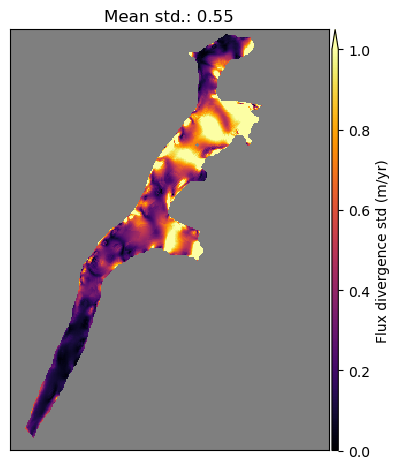

In [102]:
f,ax = plt.subplots()
stack_std = compute_stack_wt_std(flux_models[:-1])
mean = np.ma.mean(stack_std)
pltlib.iv(stack_std,ax=ax,cmap='inferno',title=f'Mean std.: {mean :.2f}' ,label='Flux divergence std (m/yr)',clim=(0,1))

In [103]:
div_q2_consensus_std_fn = os.path.splitext(divq2_concensus_fn)[0]+"_std_div.tif"
iolib.writeGTiff(stack_std,div_q2_consensus_std_fn,src_ds=ds_list[-1])

In [104]:
khumb_std = stack_std

In [105]:
0.88 - 0.55

0.32999999999999996

In [106]:
melt_df = pd.read_csv('khumbu_farinotti_2015-11-02_to_2016-10-25_altitudnal_meltstats.csv')
area_wt_mb = (melt_df['area_total']*melt_df['med_total_dhdt']).sum()/(melt_df['area_total'].sum())
area_wt_mb

-1.5787869094705052

In [107]:
(0.33/1.58)*100

20.88607594936709

## Lirung

In [108]:
%cd /nobackup/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/Lirung/SMB_data/

/nobackupp11/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/Lirung/SMB_data


In [109]:
glac_name = 'lirung'
model1_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model2_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model3_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model4_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_4/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"

In [110]:

dem1_fn = '../dem/20161106_0456_103001005FAB7A00_103001005F7EBB00-DEM_2m_align.tif'
vx_fn = '20161106_combined_hs__20171222_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_1_masked_gauss_fill51px_1.tif'
vy_fn = '20161106_combined_hs__20171222_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_1_masked_gauss_fill51px_1.tif'
divq2_concensus_fn = 'lirung_farinotti_2016-11-06_to_2017-12-22_divQ2.tif'
glac_shp = gpd.read_file(constants.fetch_glac_shp(constants.rgi_dicts[glac_name])).to_crs("EPSG:32645")
H_fn = constants.fetch_farinotti_thickness(glac_name)
millan_H_fn = constants.fetch_millan_thickness(glac_name)
ds_list = warplib.memwarp_multi_fn([H_fn,dem1_fn,model1_H_fn,model2_H_fn,model3_H_fn,model4_H_fn,millan_H_fn,vx_fn,vy_fn,divq2_concensus_fn],extent='last')
H,dem1,model1,model2,model3,model4,millan_H,vx,vy,divq2_consensus = [iolib.ds_getma(ds) for ds in ds_list]


Warping all inputs to the following:
Resolution: 25.0
Extent: [357337.5, 3122712.5, 359212.5, 3126237.5]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 10: /nobackupp11/sbhusha1/reference_data/farinotti_2019_ice_thickness/RGI60-15/RGI60-15.04045_thickness.tif
2 of 10: ../dem/20161106_0456_103001005FAB7A00_103001005F7EBB00-DEM_2m_align.tif
nl: 141 ns: 75 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...3 of 10: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_RGI60-15.04045.tif
4 of 10: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_RGI60-15.04045.tif
5 of 10: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_RGI60-15.04045.tif
6 of 10: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_4/RGI60-15/thickness_RGI60-15.04045.tif
7 of 10: /nob

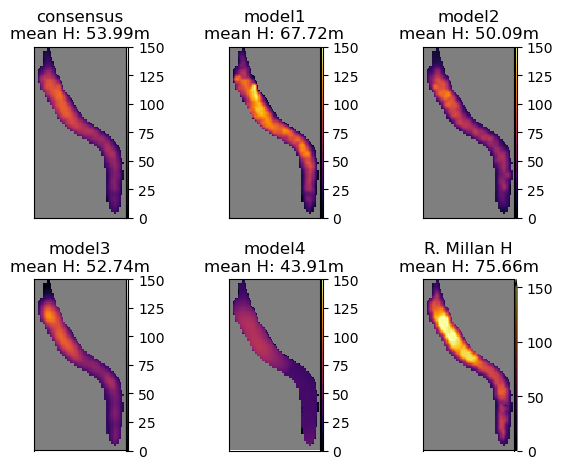

In [111]:
f,ax = plt.subplots(2,3)
models_title = ['consensus','model1','model2','model3','model4','R. Millan H']


h_models = [H,model1,model2,model3,model4,millan_H]
common_mask = malib.common_mask(h_models)
for idx,axa in enumerate(ax.ravel()):
    h = np.ma.array(h_models[idx],mask=common_mask)
    mean = np.ma.mean(h)
    plt_title = f"{models_title[idx]}\nmean H: {mean :.2f}m"
    pltlib.iv(h,ax=axa,cmap='inferno',clim=(0,150),title=plt_title)
    

In [112]:
H_list = [model1,model2,model3,model4,millan_H]
H_mask = malib.common_mask(H_list+[vx,vy])
#H_list = [np.ma.array(H,mask=H_mask) for H in H_list]
dem1 = np.ma.array(dem1,mask=H_mask)

In [113]:
H_list[0].count()

2332

<Axes: >

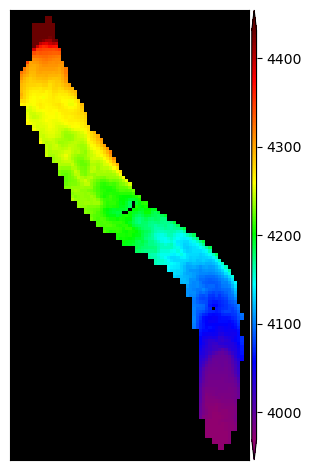

In [114]:
f,ax = plt.subplots()
pltlib.iv(dem1,ax=ax)

In [115]:
len(H_list)

5

In [116]:
divq2_consensus.mean()

-0.12128334664975468

Lengthscales in m: [44.04910087585449, 75.5907154083252, 111.02010726928711, 150.60117721557617, 186.4539337158203, 221.24004364013672, 256.5688133239746, 294.707088470459, 327.1916198730469, 363.54034423828125, 401.0338592529297, 437.5578308105469, 472.3130798339844, 507.3585510253906, 544.8049163818359, 578.9347457885742, 618.1087112426758, 645.8626556396484, 686.8202209472656, 715.7209014892578]
Lengthscales in pixels: [ 1.76  3.04  4.44  6.04  7.44  8.84 10.28 11.8  13.08 14.56 16.04 17.52
 18.88 20.28 21.8  23.16 24.72 25.84 27.48 28.64]
Applying gaussian smoothing filter with size 3 and sigma 0.333 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 3 and sigma 0.333 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 5 and sigma 0.667 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 7 and sigma 1.000 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 7 and sigma 1.

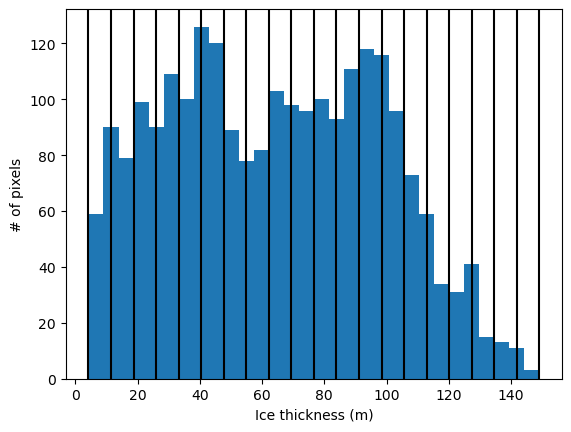

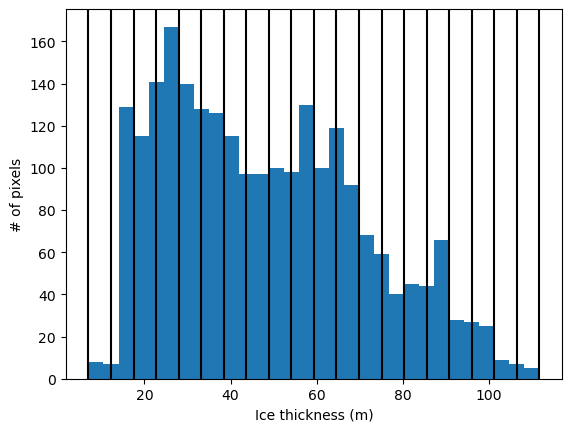

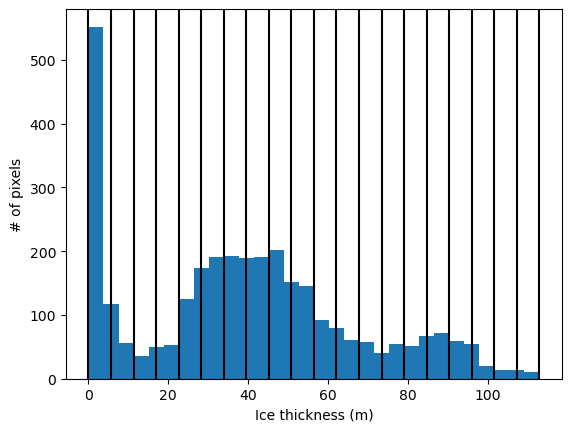

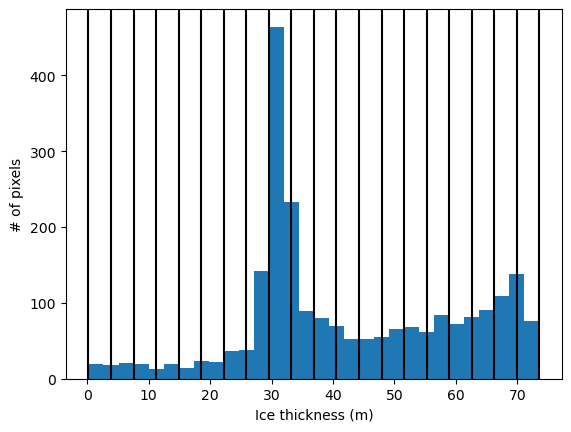

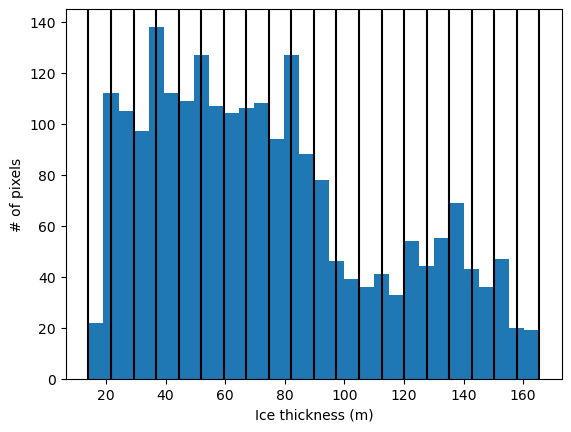

In [117]:
res = geolib.get_res(ds_list[0])[0]
num_thic_div_divq2 = 20
lengthscale_factor = 5
flux_models = []
for idx,model in enumerate(H_list):
    px_indices,lengtscales = glac_dyn.thickness_division(model,n=num_thic_div_divq2,factor=[lengthscale_factor],
                                                         res=res)
    flux_models.append(glac_dyn.compute_simple_flux_div(vx,vy,model,v_col_f=0.8,
        dx=res,dy=res,eo=1,smooth=True,px_lengthscale=lengtscales,lookup_indexes=px_indices))

In [118]:
divq2_consensus.count()

2039

In [119]:
flux_models[4].count()

1866

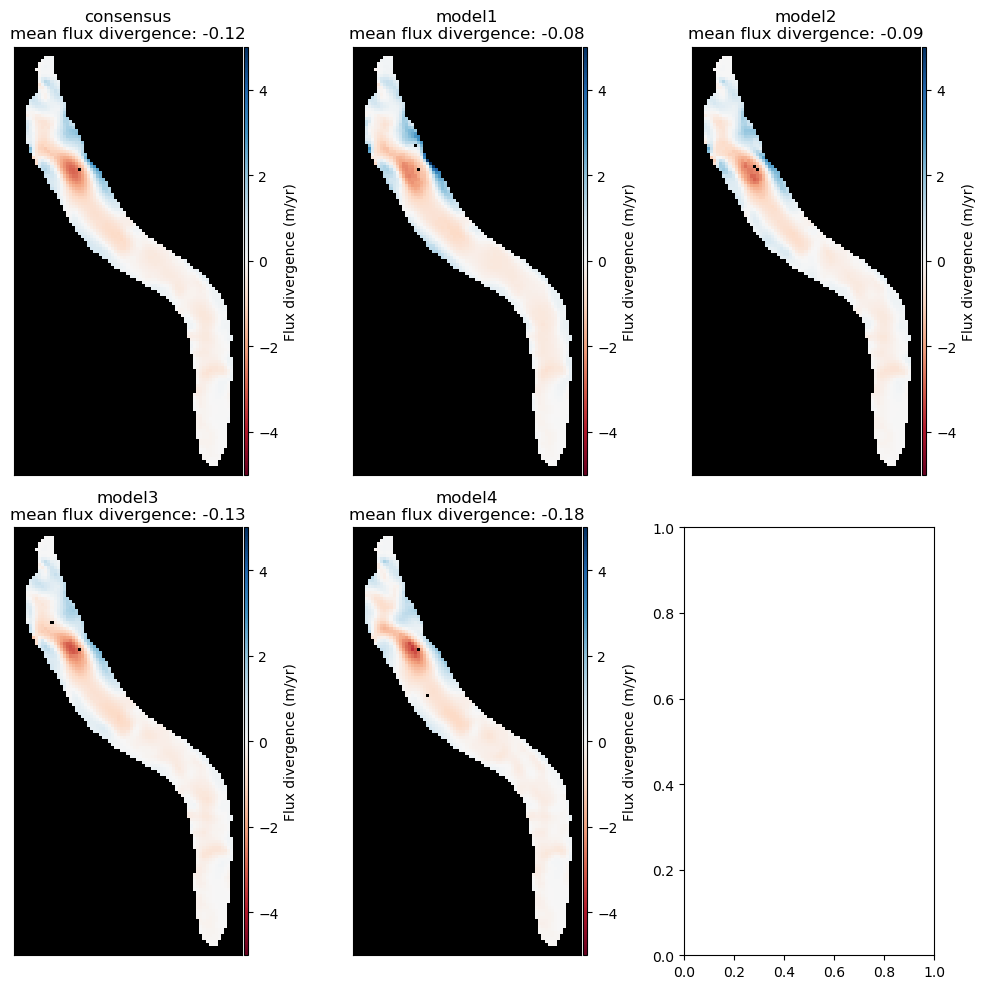

In [120]:
f,ax = plt.subplots(2,3,figsize=(10,10))
axa = ax.ravel()
#flux_models = [geospatial.mask_by_shp(glac_shp.geometry,flux,ds=ds_list[0]) for flux in flux_models] 
#common_mask = malib.common_mask(flux_models)
flux_models = [np.ma.array(flux,mask=divq2_consensus.mask) for flux in flux_models]
models_title = ['consensus','model1','model2','model3','model4','R. Millan H']
cmap = 'RdBu'
clim = (-5,5)
label = 'Flux divergence (m/yr)'
for idx,flux in enumerate([divq2_consensus]+flux_models[:-1]):
    
    mean = flux.mean()
    plt_title = f"{models_title[idx]}\nmean flux divergence: {mean :.2f}"
    pltlib.iv(flux,ax=axa[idx],cmap=cmap,clim=clim,label=label,title=plt_title)


<Axes: title={'center': 'Mean std.: 0.11'}>

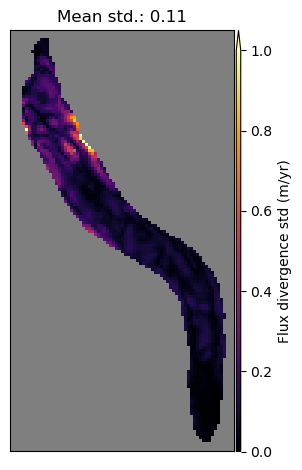

In [121]:
f,ax = plt.subplots()
stack_std = compute_stack_wt_std(flux_models[:-1])
mean = np.ma.mean(stack_std)
pltlib.iv(stack_std,ax=ax,cmap='inferno',title=f'Mean std.: {mean :.2f}' ,label='Flux divergence std (m/yr)',clim=(0,1))

In [122]:
div_q2_consensus_std_fn = os.path.splitext(divq2_concensus_fn)[0]+"_std_div.tif"
iolib.writeGTiff(stack_std,div_q2_consensus_std_fn,src_ds=ds_list[-1])

In [123]:
lirung_std = stack_std

In [139]:
z_bin_centers,flux_std_mean = elevation_aggregator(dem1,stack_std,res=[res,res])

In [150]:
lirung_df_fn = 'lirung_farinotti_2016-11-06_to_2017-12-22_altitudnal_meltstats.csv'
lirung_df = pd.read_csv(lirung_df_fn)
lirung_df['z_bin_centers'].head(14)

0     3925.0
1     3975.0
2     4025.0
3     4075.0
4     4125.0
5     4175.0
6     4225.0
7     4275.0
8     4325.0
9     4375.0
10    4425.0
11    4475.0
12    4525.0
13    4575.0
Name: z_bin_centers, dtype: float64

In [149]:
lirung_df['med_total_dhdt'].head(14)

0      NaN
1    -0.24
2    -1.45
3    -0.75
4    -0.55
5    -0.87
6    -2.15
7    -4.55
8    -3.88
9     0.83
10    0.56
11    0.18
12    0.55
13    0.75
Name: med_total_dhdt, dtype: float64

In [ ]:
f,ax = plt.subplots()


In [151]:
z_bin_centers.shape

(12,)

In [141]:
flux_std_mean

masked_array(data=[0.03, 0.07, 0.08, 0.07, 0.08, 0.15, 0.23, 0.15, 0.19,
                   0.1, 0.04, 0.05],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value=1e+20)

In [211]:
melt_df = pd.read_csv('lirung_farinotti_2016-11-06_to_2017-12-22_altitudnal_meltstats.csv')
area_wt_mb = (melt_df['area_total']*melt_df['med_total_dhdt']).sum()/(melt_df['area_total'].sum())
area_wt_mb

-1.811922967532345

In [213]:
(0.16/1.81)*100

8.83977900552486

## Black Changri Nup

In [124]:
%cd /nobackup/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/BlackChangriNup/SMB_data/

/nobackupp11/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/BlackChangriNup/SMB_data


In [125]:
glac_name = 'changri_nup'
model1_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model2_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model3_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"
model4_H_fn = f"/nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_4/RGI60-15/thickness_{constants.rgi_dicts[glac_name]}.tif"

In [126]:
vx_fn = '20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip_b1.tif'
vy_fn = '20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip_b1.tif'
divq2_concensus_fn = 'black_changri_nup_farinotti_2015-11-02_to_2016-10-25_divQ2.tif'
lag_smb_fn = 'black_changri_nup_farinotti_2015-11-02_to_2016-10-25_smb_dhdt.tif'
glac_shp = gpd.read_file('/nobackup/sbhusha1/hma/agu22_scratch/Black_changri_with_accumulation_area2.shp')
debris_thickness_fn = constants.fetch_rounce_debris_thickness(glac_name)
H_fn = constants.fetch_farinotti_thickness(glac_name)
millan_H_fn = constants.fetch_millan_thickness(glac_name)
ds_list = warplib.memwarp_multi_fn([H_fn,model1_H_fn,model2_H_fn,model3_H_fn,model4_H_fn,millan_H_fn,vx_fn,vy_fn,debris_thickness_fn,lag_smb_fn,divq2_concensus_fn],extent='last')
H,model1,model2,model3,model4,millan_H,vx,vy,debris,lag_smb,divq2_consensus = [iolib.ds_getma(ds) for ds in ds_list]


Warping all inputs to the following:
Resolution: 25.0
Extent: [476612.5, 3094162.5, 482987.5, 3099437.5]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 11: /nobackupp11/sbhusha1/reference_data/farinotti_2019_ice_thickness/RGI60-15/RGI60-15.03734_thickness.tif
2 of 11: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_1/RGI60-15/thickness_RGI60-15.03734.tif
3 of 11: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_2/RGI60-15/thickness_RGI60-15.03734.tif
4 of 11: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_3/RGI60-15/thickness_RGI60-15.03734.tif
5 of 11: /nobackupp11/sbhusha1/hma/ngozumpa_lagdz/icethickness/individual_model/results_4/RGI60-15/thickness_RGI60-15.03734.tif
6 of 11: /nobackupp11/sbhusha1/reference_data/millan_thickness/RGI-13-15/RGI60-15.03734_millan_thickness.tif
nl: 211 ns: 255 res: 25.000
100 - done.
0...10...20...30...40...50...60..

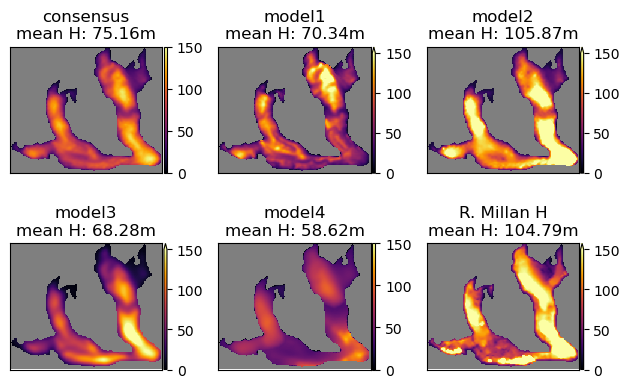

In [127]:
f,ax = plt.subplots(2,3)
models_title = ['consensus','model1','model2','model3','model4','R. Millan H']


h_models = [H,model1,model2,model3,model4,millan_H]
common_mask = malib.common_mask(h_models)
for idx,axa in enumerate(ax.ravel()):
    h = np.ma.array(h_models[idx],mask=common_mask)
    mean = np.ma.mean(h)
    plt_title = f"{models_title[idx]}\nmean H: {mean :.2f}m"
    pltlib.iv(h,ax=axa,cmap='inferno',clim=(0,150),title=plt_title)
    

In [128]:
H_list = [model1,model2,model3,model4,millan_H]
H_mask = malib.common_mask(H_list+[vx,vy,divq2_consensus])
H_list = [np.ma.array(H,mask=H_mask) for H in H_list]

Lengthscales in m: [72.75017261505127, 107.10033416748047, 139.15550231933594, 172.1784782409668, 206.19796752929688, 238.07687759399414, 277.3987007141113, 313.70677947998047, 343.27720642089844, 378.3332824707031, 412.37274169921875, 448.29261779785156, 481.6020965576172, 514.9003601074219, 552.1883392333984, 585.2838516235352, 612.3987197875977, 653.8930511474609, 682.9269409179688, 717.1585845947266]
Lengthscales in pixels: [ 2.92  4.28  5.56  6.88  8.24  9.52 11.08 12.56 13.72 15.12 16.48 17.92
 19.28 20.6  22.08 23.4  24.48 26.16 27.32 28.68]
Applying gaussian smoothing filter with size 3 and sigma 0.333 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 5 and sigma 0.667 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 5 and sigma 0.667 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 7 and sigma 1.000 (sum 1.000)
Applying original mask
Applying gaussian smoothing filter with size 9 and si

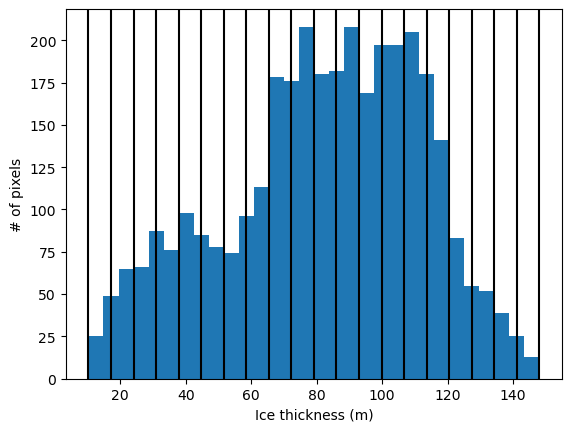

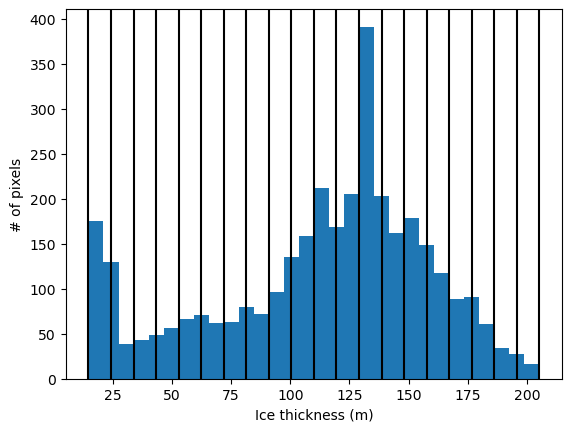

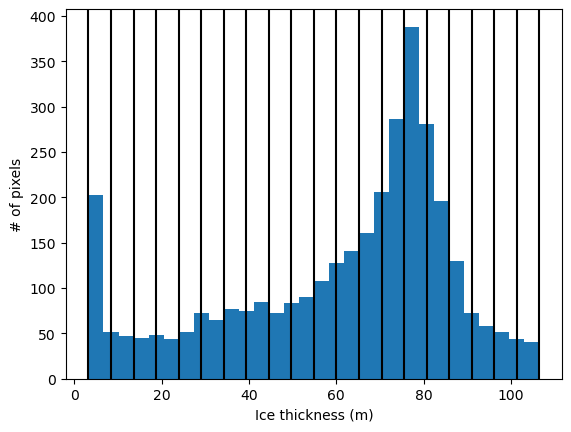

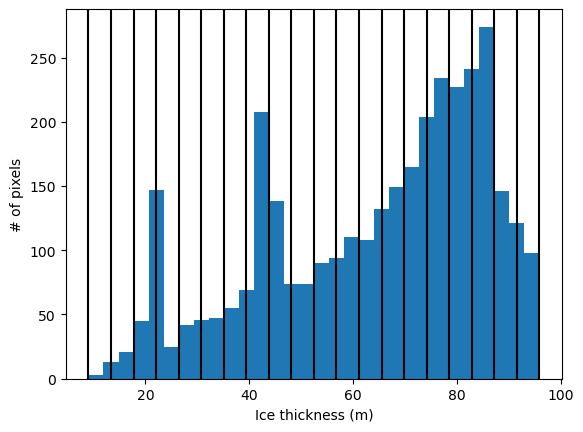

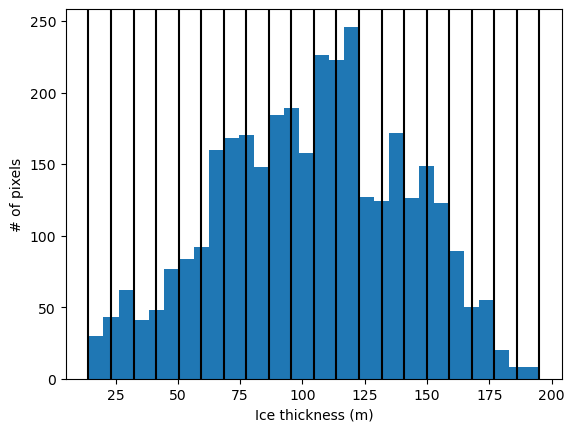

In [129]:
res = geolib.get_res(ds_list[0])[0]
num_thic_div_divq2 = 20
lengthscale_factor = 5
flux_models = []
for idx,model in enumerate(H_list):
    px_indices,lengtscales = glac_dyn.thickness_division(model,n=num_thic_div_divq2,factor=[lengthscale_factor],
                                                         res=res)
    flux_models.append(glac_dyn.compute_simple_flux_div(vx,vy,model,v_col_f=0.8,
        dx=res,dy=res,eo=1,smooth=True,px_lengthscale=lengtscales,lookup_indexes=px_indices))

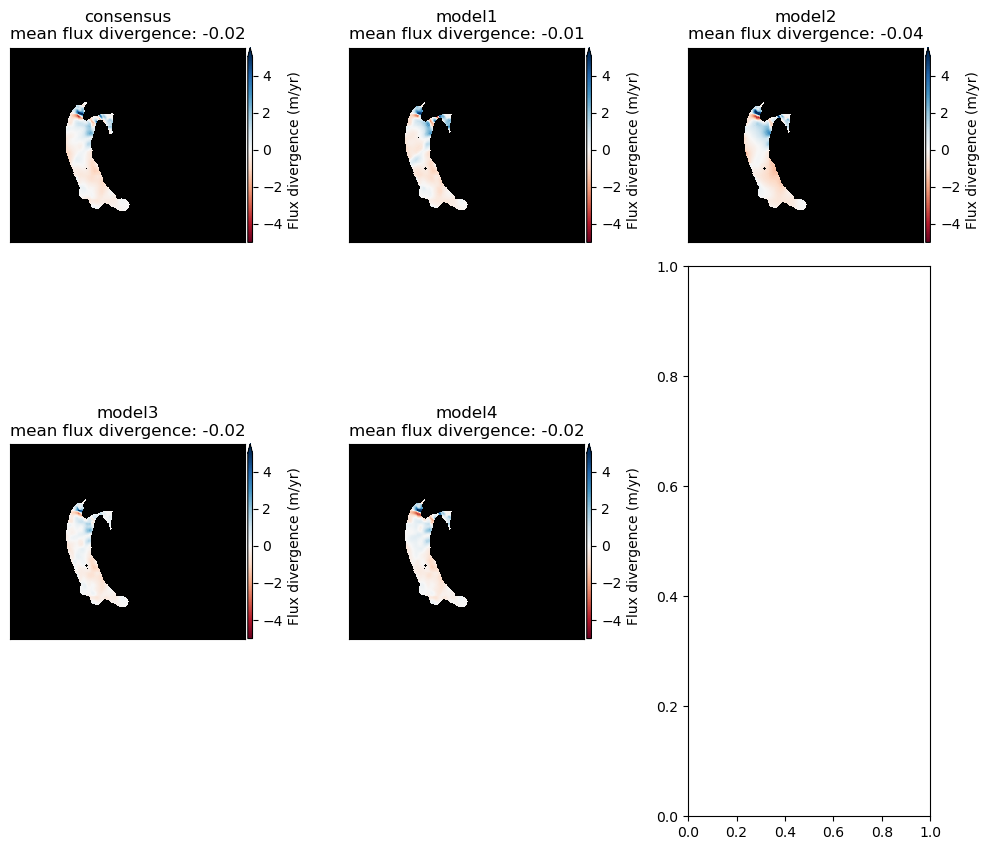

In [130]:
f,ax = plt.subplots(2,3,figsize=(10,10))
axa = ax.ravel()
flux_models = [geospatial.mask_by_shp(glac_shp.geometry,flux,ds=ds_list[0]) for flux in flux_models] 
#common_mask = malib.common_mask(flux_models)
flux_models = [np.ma.array(flux,mask=divq2_consensus.mask) for flux in flux_models]
models_title = ['consensus','model1','model2','model3','model4','R. Millan H']
cmap = 'RdBu'
clim = (-5,5)
label = 'Flux divergence (m/yr)'
for idx,flux in enumerate([divq2_consensus]+flux_models[:-1]):
    
    mean = flux.mean()
    plt_title = f"{models_title[idx]}\nmean flux divergence: {mean :.2f}"
    pltlib.iv(flux,ax=axa[idx],cmap=cmap,clim=clim,label=label,title=plt_title)

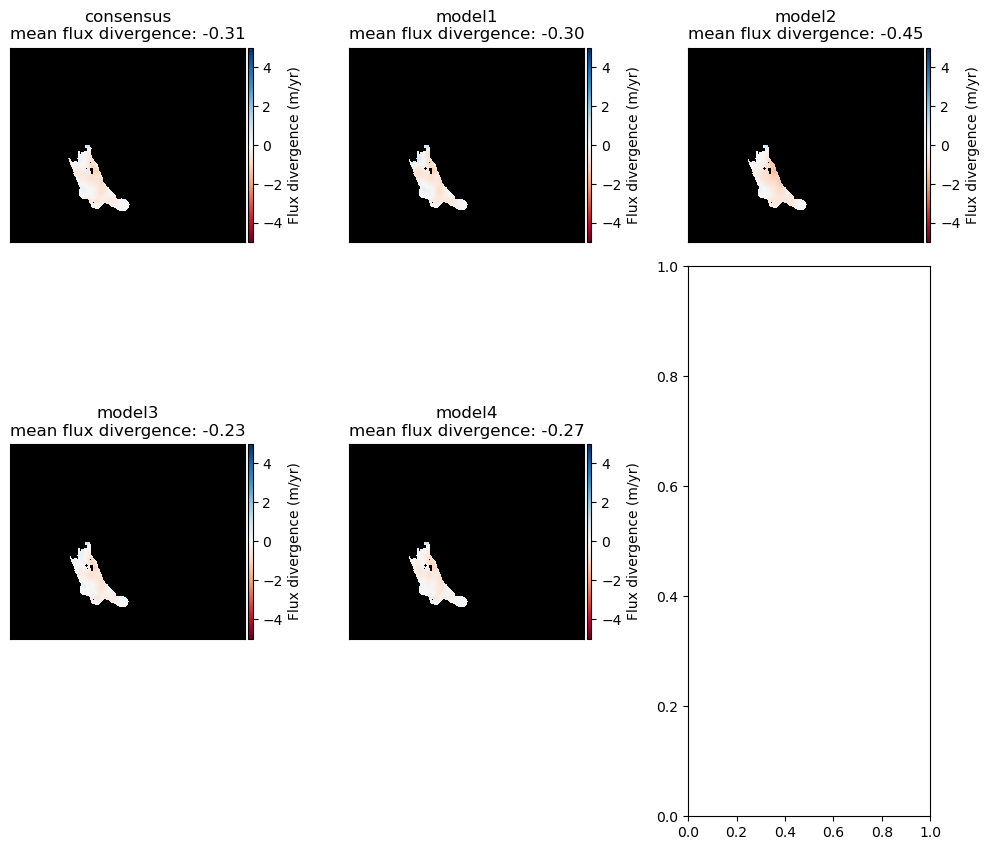

In [131]:
f,ax = plt.subplots(2,3,figsize=(10,10))
axa = ax.ravel()
flux_models = [geospatial.mask_by_shp(glac_shp.geometry,flux,ds=ds_list[0]) for flux in flux_models] 
#common_mask = malib.common_mask(flux_models)
flux_models = [np.ma.array(flux,mask=divq2_consensus.mask) for flux in flux_models]
debris_mask = malib.common_mask([divq2_consensus,debris])
models_title = ['consensus','model1','model2','model3','model4','R. Millan H']
cmap = 'RdBu'
clim = (-5,5)
label = 'Flux divergence (m/yr)'
for idx,flux in enumerate([divq2_consensus]+flux_models[:-1]):
    flux = np.ma.array(flux,mask=debris_mask)
    mean = flux.mean()
    plt_title = f"{models_title[idx]}\nmean flux divergence: {mean :.2f}"
    pltlib.iv(flux,ax=axa[idx],cmap=cmap,clim=clim,label=label,title=plt_title)


<Axes: title={'center': 'Mean std.: 0.23'}>

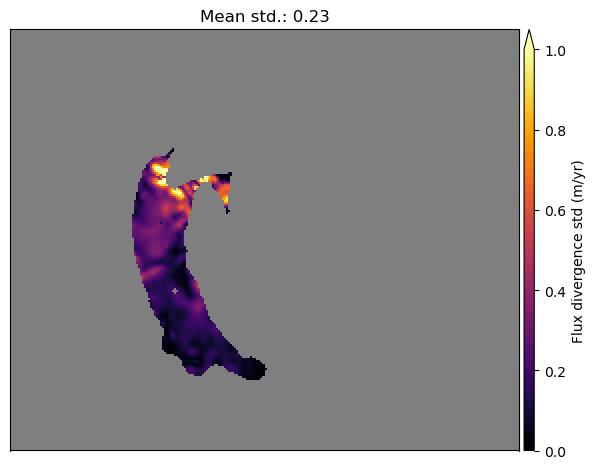

In [132]:
f,ax = plt.subplots()
stack_std = compute_stack_wt_std(flux_models[:-1])
mean = np.ma.mean(stack_std)
pltlib.iv(stack_std,ax=ax,cmap='inferno',title=f'Mean std.: {mean :.2f}' ,label='Flux divergence std (m/yr)',clim=(0,1))

In [133]:
div_q2_consensus_std_fn = os.path.splitext(divq2_concensus_fn)[0]+"_std_div.tif"
iolib.writeGTiff(stack_std,div_q2_consensus_std_fn,src_ds=ds_list[-1])

In [134]:
bcn_std = stack_std

<Axes: title={'center': 'Mean std.: 0.12'}>

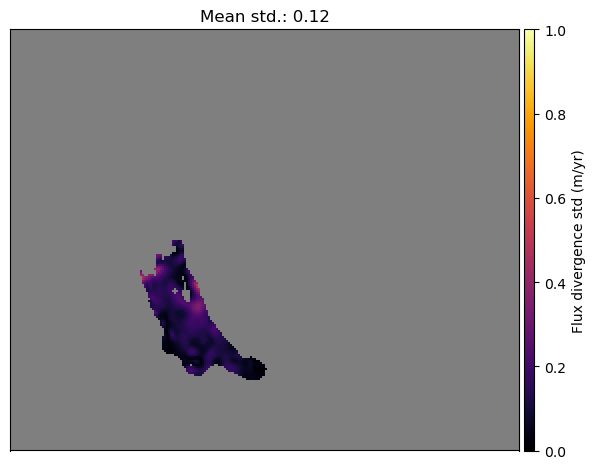

In [88]:
f,ax = plt.subplots()
flux_debris = [np.ma.array(flux,mask=debris.mask) for flux in flux_models]
stack_std = compute_stack_wt_std(flux_debris[:-1])
mean = np.ma.mean(stack_std)
pltlib.iv(stack_std,ax=ax,cmap='inferno',title=f'Mean std.: {mean :.2f}' ,label='Flux divergence std (m/yr)',clim=(0,1))

In [319]:
np.ma.array(lag_smb,mask=debris_mask).mean()

-1.1738699063810132

In [320]:
(0.12/1.17)*100

10.256410256410255

In [ ]:
glac_shap

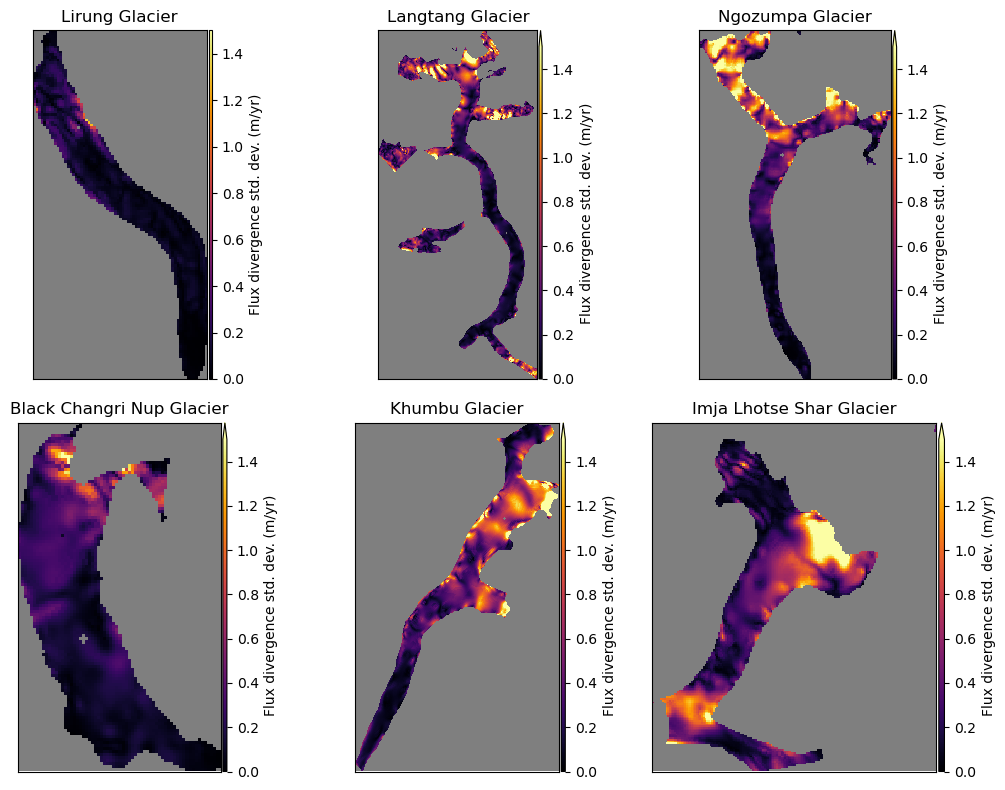

In [144]:
std_list = [lirung_std,langtang_std,ngozumpa_std,bcn_std,khumb_std,imja_std]
title_list = ['Lirung Glacier','Langtang Glacier','Ngozumpa Glacier','Black Changri Nup Glacier','Khumbu Glacier','Imja Lhotse Shar Glacier']
f,ax = plt.subplots(2,3,figsize=(11,8))
std_dev_clim = (0,1.5)
for idx,axa in enumerate(ax.ravel()):
    pltlib.iv(malib.ndv_trim(std_list[idx]),ax=axa,cmap='inferno',clim=std_dev_clim,label='Flux divergence std. dev. (m/yr)',title=title_list[idx])
plt.tight_layout()
f.savefig('../../../figures/Spatial_stddev_map_figure.png',dpi=300,bbox_inches='tight',pad_inches=0.1)